# Introduction

## Neural Networks: From Hero to Zero - Lecture 4

In this notebook, we delve into the insights and concepts presented in Andrej Karpathy's Lecture 4: "Building makemore Part 3: Activations & Gradients, BatchNorm", based on the YouTube video [here](https://www.youtube.com/watch?v=P6sfmUTpUmc). The lecture explores the intricacies of neural network training, emphasizing the significance of proper initialization and understanding the behavior of activations and gradients.

## Overview:

1. **Introduction to Neural Network Initialization**:
    - The lecture began by highlighting the importance of proper initialization, especially for deeper architectures.
    - A primary issue addressed was the discrepancy between the expected loss at initialization and the observed loss, emphasizing the pitfalls of improper initialization.

2. **Understanding Activations & Gradients**:
    - The importance of comprehending activations and the gradients flowing backward during training was underscored.
    - Specific challenges associated with recurrent neural networks (RNNs) were discussed, emphasizing their difficulty in optimization with first-order gradient-based techniques.

3. **Common Issues in Neural Networks**:
    - Problems arising from the use of the tanh activation function, such as saturated activations leading to vanishing gradients, were addressed.
    - The concept of 'dead neurons' in the context of the ReLU activation function was introduced, highlighting its potential detrimental effects during training.

4. **Initialization in Neural Networks**:
    - Proper initialization was stressed as essential for maintaining activations and gradients in a suitable range, preventing gradient vanishing or exploding.
    - The significance of proper initialization was demonstrated through improved training loss metrics.

5. **Batch Normalization**:
    - Batch normalization's role in stabilizing and accelerating deep neural network training was explored.
    - The technique's benefits, underlying motivation, implementation details, and potential considerations were detailed.

6. **ResNet and Activation Statistics**:
    - An introduction to the Residual Neural Network (ResNet) architecture and its components.
    - The role of convolutional layers, batch normalization, and proper initialization techniques in neural networks was discussed.
    - The lecture then transitioned into 'PyTorchifying' the code, introducing PyTorch's modular structure for neural networks.

7. **Diagnostic Tools for Neural Network Training**:
    - The lecture offered a range of visualization techniques to diagnose and comprehend a neural network's state during training, from monitoring activations and gradients to understanding parameter evolutions.
    - The impact of BatchNorm on training stability and the significance of non-linear activation functions were also discussed.

8. **Conclusion**:
    - Training neural networks was likened to a 'balancing act', underscoring the balancing required among initialization, learning rate, and other parameters.
    - Modern techniques, such as BatchNorm, have made the training process more stable and robust.

Let's delve deeper into each of these sections to gain a comprehensive understanding of the lecture's content.

## Summary of transcript

---

In this lecture, the focus is on understanding the importance of proper initialization in neural networks, especially when dealing with deeper architectures. Here are the key points:

1. **Character Level Language Modeling**: The lecture continued with the implementation of a multi-layer perceptron (MLP) for character level language modeling, following a paper from 2003.

2. **Understanding Activations & Gradients**: Before moving on to more complex architectures like recurrent neural networks (RNNs), the lecturer emphasized the importance of having a deep understanding of activations in a neural net, especially during training. This also includes understanding the gradients that flow backward during training.

3. **Challenges with RNNs**: While RNNs are universal approximators and can theoretically implement all algorithms, they aren't easily optimizable with the first-order gradient-based techniques commonly used. Understanding activations and gradients helps in understanding why this is the case.

4. **Issues with Initial Loss**: At initialization, the loss recorded was 27, which was too high. Ideally, at initialization, the neural net should have no bias towards any particular character, implying a uniform distribution of probabilities. The expected loss at initialization, given a uniform distribution, is 3.29. The lecturer identified that this discrepancy is due to the improper initialization of the neural network.

5. **Saturated tanh Activations**: The tanh activation function can squash its inputs into a range between -1 and 1. If most of the outputs of tanh are close to these extremes, gradients can vanish during backpropagation. This is because the derivative of tanh is close to zero at these extremes, causing gradients to become small and updates to become negligible.

6. **Dead Neurons**: The lecture touched upon the concept of 'dead neurons', particularly in the context of the ReLU activation function. A dead neuron is one that never activates regardless of the input data. For ReLU, if the output is always 0 (due to negative inputs), the gradient will always be 0, and the neuron will never update. This can be detrimental during training, especially if many neurons are 'dead'.

7. **Importance of Proper Initialization**: Proper initialization ensures that activations and gradients are in a reasonable range, preventing issues like gradient vanishing or exploding. This is even more crucial in deeper networks where bad initialization can render the network untrainable.

8. **Improvements with Proper Initialization**: By addressing the initialization issues, the training loss was improved from 2.17 to 2.10, illustrating the significance of proper initialization.

In summary, the lecture delved deep into the intricacies of neural network initialization, highlighting the issues that can arise from improper initialization and the impact it can have on training deeper networks. Proper initialization can lead to better convergence and improved model performance.

---

## Initializing Weights in Neural Networks

When training deep neural networks, the way we initialize the weights can significantly affect the speed of convergence and even the final performance of the network. Initializing weights properly ensures that activations across layers don't reach extremely high or low values, which can lead to vanishing or exploding gradients, thereby making training difficult.

### The Problem

- Using random weights (e.g., from a Gaussian distribution) for deep networks can lead to activations that either explode (become very large) or vanish (become very small) as they pass through layers.
- If activations become very large or very small, the gradients will either explode or vanish during backpropagation, making training challenging.

### Kaiming Initialization

- **Kaiming Initialization** (also known as He Initialization) is a method proposed to address this problem.
- It's designed to keep the scale of the gradients roughly the same in all layers.
- For weights initialized from a Gaussian distribution, the method suggests setting the standard deviation of the weights to \(\frac{\text{gain}}{\sqrt{\text{fan\_in}}}\), where:
  - \(\text{gain}\) is a value dependent on the activation function used.
  - \(\text{fan\_in}\) is the number of input units in the weight tensor.

### Gain Values for Different Activation Functions

- The gain value depends on the activation function used in the network:
  - Linear or Identity: \( \text{gain} = 1 \)
  - ReLU: \( \text{gain} = \sqrt{2} \)
  - Tanh: \( \text{gain} = \frac{5}{3} \)

The reason for these specific gain values is that activation functions like ReLU and Tanh squash their input in certain ways. For example, ReLU clamps all negative values to zero, effectively reducing the variance of the activations. To counteract this, we use a gain value greater than 1.

### Practical Advice

- While historically, precise initialization was crucial for training deep networks, modern innovations such as residual connections, normalization layers (e.g., batch normalization), and advanced optimizers (e.g., Adam) have made initialization less critical.
- However, using a principled approach like Kaiming Initialization is still recommended, especially when not using the aforementioned innovations.
- In frameworks like PyTorch, Kaiming Initialization is readily available and can be applied with a single function call.

### Conclusion

Proper weight initialization is an essential step in training deep neural networks. Using a method like Kaiming Initialization provides a principled approach to this problem, ensuring that activations and gradients remain well-behaved throughout the training process.

---

# Batch Normalization in Neural Networks

Batch normalization (often abbreviated as "batchnorm") is a method introduced in 2015 by a team from Google to stabilize and accelerate the training of deep neural networks. This technique offers several benefits and addresses key challenges in training deep networks.

## Motivation

1. **Activation Initialization:** Properly initializing neural network weights is essential for stable and quick convergence during training. However, ensuring that activations (or pre-activations) throughout the layers of a neural network are well-behaved becomes challenging as networks grow deeper.
2. **Desired Activation Statistics:** Ideally, the pre-activation statistics (before applying the non-linearity) should be roughly Gaussian (zero mean and unit variance) at least during the initialization. This ensures that:
    - The activations aren't too small, preventing the non-linearity from being inactive.
    - The activations aren't too large, preventing saturation of the non-linearity and impeding gradient flow.

## Core Idea

If we desire the activations to have a certain distribution (e.g., Gaussian), why not explicitly enforce it? This is the fundamental idea behind batch normalization:
1. Normalize the activations to have zero mean and unit variance.
2. This normalization is differentiable, making it compatible with backpropagation.

## Implementation

1. **Batch Statistics:** For a given batch of data, compute the mean and standard deviation for each neuron's activations.
2. **Normalization:** For each neuron, subtract its mean and divide by its standard deviation, ensuring that the activations are roughly standardized.
3. **Scale and Shift:** Since we only want the activations to be Gaussian-like during initialization (not always), we introduce two parameters for each neuron: a scale (gain) and a shift (bias). These are learned during training via backpropagation.
4. **Running Statistics (for inference):** During training, maintain a running average of the mean and standard deviation for each neuron. This is useful during inference, especially when processing individual examples or batches of different sizes.

## Key Insights

1. **Regularizing Effect:** Batch normalization introduces a form of noise into the training process. This noise comes from the fact that each example's normalization statistics depend on the other examples in the batch. This acts as a form of regularization, preventing overfitting.
2. **Decoupling of Examples:** One of the peculiarities of batch normalization is that it couples examples during training. This means the output for a specific example depends not only on that example but also on the other examples in the batch. This behavior is often viewed as undesirable, but it's one of the reasons batch normalization acts as a regularizer.
3. **Efficiency:** The running statistics allow the network to process individual examples during inference efficiently, avoiding the need to compute statistics on-the-fly.

## Considerations

1. **Redundant Biases:** When using batch normalization after a layer, the bias term in the original layer becomes redundant. This is because the normalization process will zero out this bias. Therefore, it's common to exclude the bias term in layers followed by batch normalization.
2. **Epsilon Term:** A small epsilon value is added during the normalization step to prevent division by zero.

## Conclusion

Batch normalization is a powerful tool for training deep neural networks. By controlling the distribution of activations, it aids in stabilizing training and acts as a regularizer. While it introduces some complexities, its benefits in training deeper networks reliably are undeniable.

---

# ResNet and Activation Statistics in Neural Networks

## Residual Neural Network (ResNet)

- **What is it?** ResNet is a deep neural network used mainly for image classification.
- **Structure**: Composed of many layers with a repeating structure leading to predictions.
- **Key Block**: "Bottleneck Block" which repeats sequentially in the network.
  
## Convolutional Layers

- **Purpose**: Used for image data to leverage spatial structure.
- **Operation**: Similar to a linear layer but acts on overlapping patches of the input, rather than the full input.
- **Equation**: \( WX + b \)

## Batch Normalization

- **What is it?** A technique to improve the performance and stability of neural networks by normalizing layer inputs.
- **Key Components**:
  - **Mean and Variance**: Calculate from the current batch during training.
  - **Gamma and Beta**: Learnable scaling and shifting parameters.
  - **Running Mean and Variance**: Kept for inference.
  - **Momentum**: Controls the update of running statistics. Smaller batch sizes might need lower momentum values.
- **Purpose**: Ensures activations are roughly Gaussian throughout the neural network.
- **Advantages**: Allows for deeper neural network training.
- **Caveats**: Can introduce bugs due to its coupling effect on examples in the forward pass.

## Initialization

- **Why is it important?**: Proper initialization ensures activations neither squash to zero nor explode to infinity.
- **Common Techniques**:
  - **LeCun Initialization**: Scales weights by \( \frac{1}{\sqrt{K}} \), where \( K \) is the number of input features.
  - **PyTorch Default**: Uses a uniform distribution based on the fan-in.

## PyTorchifying the Code

- **Modules**: PyTorch structures neural networks using modules.
  - **Linear Layer**: Equivalent to \( WX + b \) operation.
  - **BatchNorm Layer**: Implements the batch normalization technique.
  - **Tanh Layer**: Applies the tanh non-linearity.
- **Structure**: Networks can be created by stacking layers and calling them sequentially.

## Key Takeaways

1. **Activation Statistics**: Understanding activations and gradients is crucial, especially for deeper networks.
2. **Initialization Matters**: Proper initialization ensures stable and efficient training.
3. **Batch Normalization**: Helps in controlling activation statistics but use with caution due to potential pitfalls.
4. **PyTorch Structure**: Understand how neural networks are structured in PyTorch using layers and modules for efficient implementation and training.

## Next Steps

Dive deeper into recurrent neural networks (RNNs), which are essentially very deep networks when unrolled over time.

---

The lecture focused on understanding and visualizing the behavior of neural networks during training, with an emphasis on the activations, gradients, and parameters. Here's a concise summary:

1. **Batch Normalization (BatchNorm)**:
   - Introduced as a modern innovation to stabilize deep neural network training.
   - It normalizes the activations of a given layer, ensuring that they have a mean of zero and a standard deviation of one.
   - This normalization helps in maintaining a consistent scale of activations across layers, which can significantly aid in the training of deep networks.
   
2. **PyTorch Implementation**:
   - The lecturer 'PyTorchified' the code, introducing the concept of modules or layers, such as Linear, BatchNorm1D, and Tanh.
   - These layers can be used as building blocks to assemble neural networks in PyTorch.
   - The API developed in the lecture matches the PyTorch API, meaning one can easily transition from the lecture's code to actual PyTorch code.

3. **Diagnostic Tools for Training**:
   - The lecturer presented several visualization techniques to diagnose and understand the state of a neural network during training:
     - **Forward Pass Activations**: It's essential to monitor the activations to ensure that they are not saturating, which can hinder the flow of gradients during backpropagation.
     - **Backward Pass Gradients**: Monitoring gradients is crucial to ensure that they are not vanishing or exploding, which can slow down or destabilize training.
     - **Parameter Activations & Gradient Statistics**: Monitoring the parameters and their gradients gives insight into how the network's weights are evolving and if they're being updated reasonably.
     - **Update-to-Data Ratio Over Time**: This metric gives a sense of the scale of the parameter updates relative to the parameters themselves. It's a crucial diagnostic to ensure the learning rate is set appropriately.

4. **Impact of BatchNorm**:
   - BatchNorm makes the network more robust to the initial weight scales and the gain of activation functions.
   - While activations and gradients become more consistent due to BatchNorm, it's essential to calibrate the learning rate based on the update-to-data ratio.

5. **Significance of Non-linearities**:
   - Without non-linear activation functions (like Tanh), stacking multiple linear layers only results in a linear transformation, limiting the network's representational power.
   - Non-linearities introduce the capability to approximate arbitrary functions.

6. **Balancing Act in Training**:
   - Before the introduction of techniques like BatchNorm, training neural networks was likened to a 'balancing act', where every parameter, including the initialization and learning rate, had to be precisely set.
   - Modern techniques, like BatchNorm, make training more stable and less sensitive to specific parameter settings.

Overall, the lecture provided both a theoretical understanding and practical tools for training neural networks, emphasizing the importance of visualization and diagnostics in the training process.









# Dataset processing

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-08-23 08:03:48--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-08-23 08:03:48 (6.83 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


# Full Training with initial code from makemore lecture 2

In [ ]:
# MLP revisited
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g)
W2 = torch.randn((n_hidden, vocab_size),          generator=g)
b2 = torch.randn(vocab_size,                      generator=g)


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 27.8817
  10000/ 200000: 2.9415
  20000/ 200000: 2.5069
  30000/ 200000: 2.7998
  40000/ 200000: 2.0261
  50000/ 200000: 2.5863
  60000/ 200000: 2.3420
  70000/ 200000: 2.0952
  80000/ 200000: 2.3454
  90000/ 200000: 2.2365
 100000/ 200000: 2.1080
 110000/ 200000: 2.3831
 120000/ 200000: 1.9898
 130000/ 200000: 2.4591
 140000/ 200000: 2.1910
 150000/ 200000: 2.1606
 160000/ 200000: 2.1811
 170000/ 200000: 1.7997
 180000/ 200000: 2.0962
 190000/ 200000: 1.8052


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.127678871154785
val 2.1750576496124268


# Problem 1: Fixing softmax being confidently wrong



### 1. What is Initialization in Neural Networks?

When we create a neural network, we start by setting initial values to the weights (and sometimes biases) of the network. This is known as "initialization". These initial values are not random guesses; they are typically small numbers drawn from specific distributions, like a uniform or normal distribution. The choice of these initial values can affect the training process.

### 2. What Does the Loss at Initialization Mean?

After initialization, before any training has occurred, we can run our data through the network and calculate the loss. This initial loss gives us a baseline to compare against as training progresses. If our network is set up correctly and our initialization is reasonable, the loss should decrease as we train the network.

### 3. Why Do We Have an Idea of the Expected Loss at Initialization?

The lecturer's statement means that based on the problem type and the loss function you're using, you can have an intuitive estimate of what the initial loss should be.

For example:
- **Binary Classification Problem with Sigmoid Activation and Binary Cross-Entropy Loss**: If you have a balanced dataset (equal number of positive and negative examples), and you've not trained your model yet, then the model should be guessing the outcome, so the expected loss should be around `-log(0.5) = 0.693` because the model is essentially flipping a coin for each prediction.
  
- **Multiclass Classification Problem with Softmax Activation and Categorical Cross-Entropy Loss**: For a problem with, say, 10 classes, the model's initial guess for each class should be about 0.1 (or 10%), so the expected loss would be `-log(0.1) = 2.302`.

This doesn't mean you'll always get these exact numbers, but if your initial loss is wildly different from these ballpark figures, it might indicate something's off with your setup.

### In Simple Terms:

Imagine you're trying to guess the weight of a mystery object in a box. If someone tells you it's a feather, you'd guess it's very light. If they tell you it's a bowling ball, you'd guess it's heavy. Similarly, based on the problem you're solving and the method (loss function) you're using to measure your guesses, you can have a rough idea of how good or bad your initial guess (initial loss) should be.

In [ ]:
# our initial loss is very high. It is a problem.
# because we have 27 characters
# the initial loss should be this value.
-torch.tensor(1/27.0).log()

tensor(3.2958)

In [ ]:
# 4-D example of the issue
logits = torch.tensor([0.0, 0.0, 0.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss

(tensor([0., 0., 0., 0.]),
 tensor([0.2500, 0.2500, 0.2500, 0.2500]),
 tensor(1.3863))

In [ ]:
logits = torch.tensor([0.0, 0.0, 5.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss

(tensor([0., 0., 5., 0.]),
 tensor([0.0066, 0.0066, 0.9802, 0.0066]),
 tensor(0.0200))

In [ ]:
logits = torch.tensor([0.0, 5.0, 0.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss

(tensor([0., 5., 0., 0.]),
 tensor([0.0066, 0.9802, 0.0066, 0.0066]),
 tensor(5.0200))

In [ ]:
logits = torch.randn(4)
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss

(tensor([ 0.6043,  1.0113, -0.6466,  1.3791]),
 tensor([0.2017, 0.3030, 0.0577, 0.4377]),
 tensor(2.8521))

In [ ]:
logits = torch.randn(4) * 10
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss

(tensor([13.6184, -9.6924,  1.2633,  8.2592]),
 tensor([9.9531e-01, 7.4854e-11, 4.2877e-06, 4.6827e-03]),
 tensor(12.3597))



## What are Logits?

Imagine you're trying to categorize a photo of a fruit as either an apple, an orange, or a banana. After processing the image through a neural network, you want to decide which category the fruit belongs to. The final layer of your neural network will produce a set of values that represent the "strength" or "confidence" of each category. These values are called **logits**.

### Breaking it Down

1. **Raw Scores:** Logits are essentially the raw output scores that a neural network produces for each category. In our fruit example, we'd have a score for apple, a score for orange, and a score for banana.
   
2. **Not Probabilities (Yet):** It's crucial to understand that logits are not probabilities. They can be any set of real numbers, positive, negative, zero, large, or small.

3. **Transformation to Probabilities:** To convert logits into probabilities, we pass them through a function called the **Softmax function**. This function takes the logits, exponentiates them, and then normalizes them so that they sum up to 1. After this transformation, you get the probability distribution over the categories.

### An Analogy

Imagine you're in a classroom, and the teacher asks students how confident they are about the answer to a question. Each student shouts out a number. Some are very confident and shout a high number, some are unsure and give a middling number, and some think they're wrong and say a low number. These shouted numbers are like logits.

Now, if the teacher wants to understand these confidence levels in terms of percentages (or probabilities), she would need a way to convert these shouted numbers into percentages that add up to 100%. The process of doing this conversion is similar to applying the Softmax function.

---

In summary, logits are the raw scores or confidence levels that a neural network outputs for each category. To make decisions or interpret these scores, we often convert logits into probabilities using the Softmax function.

## Initializing the logits

### 1. What are logits?
First, a quick recap: logits are the raw scores or outputs from the last layer of a neural network before applying an activation function like softmax.

### 2. What does it mean for logits to be equal at initialization?
When initializing a neural network, the logits don't have to be specifically zero; they just need to be equal. This means that, for a classification task, the network doesn't have a preference for any particular class at the start.

### 3. Why can logits be one or any other equal number?
The lecturer mentions that even if all logits are one, it's okay. This is because the softmax function, which is often used in classification tasks, normalizes these logits into probabilities. When the softmax function is applied to equal values, it produces equal probabilities. So, if you have three classes and the logits for them are [1, 1, 1], after applying softmax, you'd get a probability distribution like [0.33, 0.33, 0.33].

### 4. Why do we want logits to be zero or symmetric?
Setting all logits to zero (or any equal value) ensures symmetry. This means the model starts with a neutral stance without favoring any class. It's like saying, "I'm not sure which class this belongs to, so I'll guess they all have an equal chance." Initializing with zeros (or equal values) prevents the model from being biased towards any particular class from the start.

### In Simple Terms:
Imagine you're blindfolded and asked to divide a cake into equal parts for three friends, but you have no idea about the size or shape of the cake. To be fair, you'd probably try to cut the cake in such a way that each friend gets an equal piece. Similarly, when a neural network starts learning, it doesn't know which class is more likely, so it begins by saying, "I think all classes are equally likely." This is what it means to have equal logits at initialization.

## Changing \(W2\) and \(b2\)

### 1. **Why change \(W_2\) and \(b_2\) for a good initial loss?**

When you're training a neural network, the initial values of the weights and biases can significantly impact how fast the network learns and even whether it can learn effectively at all. If the initial values are too large or too small, it can make the learning process unstable or slow. Starting with a good initial loss means the network is in a reasonably good place to start learning. It won't waste time adjusting to a more reasonable starting point, and it's less likely to get stuck in a poor solution.

### 2. **Why do we initialize \(W_2\) and \(b_2\) differently?**

When initializing weights and biases in a neural network, the goal is to break the symmetry. If all weights were initialized to the same value, then during training, all neurons in a layer would update in the same way, making them redundant. Different initialization strategies help neurons learn different features.

#### \(W_2\) Initialization:

- \(W_2\) is initialized with small random values (multiplied by 0.01). This is a common practice to ensure that the outputs (logits) of the network are small. Small logits fed into a softmax function (usually the next step in a classification problem) will produce a distribution that's close to uniform. This means the network starts with a guess that's close to "I'm equally unsure about each class," which is a reasonable starting point.

#### \(b_2\) Initialization:

- \(b_2\) is initialized to zero. This is because the bias term in neural networks is responsible for shifting the output of a neuron. Initializing biases to zero means we're not giving any class an initial advantage. It's like saying, "Before I start learning, I won't assume any class is more likely than the others." Over time, as the network learns, it will adjust these biases based on the data.

### In Simple Terms:

Imagine you're trying to learn how to shoot a basketball into a hoop. If you start by always shooting in a random direction, you're not likely to get the ball in very often, and it might take a while before you even figure out which direction the hoop is in.

But, if you start with a reasonable guess, like "I think the hoop is in front of me," and adjust from there, you'll likely learn faster. The way we initialize \(W_2\) and \(b_2\) is like giving our neural network a reasonable starting guess, so it doesn't waste time shooting the basketball in random directions.

In [ ]:
# Reinitialize our network

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g)
W2 = torch.randn((n_hidden, vocab_size),          generator=g)
b2 = torch.randn(vocab_size,                      generator=g)


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
# stop after 1 iteration and look at loss
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  break

      0/ 200000: 27.8817


In [ ]:
# we see our logits have extreme values.
# this makes a fake confidence in incorrect values
# and makes the loss very high
# we want these logits much closer to 0.0
logits[0]

tensor([ -2.3527,  36.4366, -10.7306,   5.7165,  18.6409, -11.6998,  -2.1991,
          1.8535,  10.9996,  10.6730,  12.3507, -10.3809,   4.7243, -24.4257,
         -8.5909,   1.9024, -12.2744, -12.4751, -23.2778,  -2.0163,  25.8767,
         14.2108,  17.7691, -10.9204, -20.7335,   6.4560,  11.1615],
       grad_fn=<SelectBackward0>)

In [ ]:
# solution: we make b2 0.0 and scale down W2
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g)
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
# stop after 1 iteration and look at loss
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  break

      0/ 200000: 3.3221


In [ ]:
# loss is much lower.
# logits closer to 0.0
logits[0]

tensor([-0.0249,  0.3523, -0.1267,  0.0541,  0.1662, -0.1171, -0.0140,  0.0124,
         0.0921,  0.1135,  0.1362, -0.0925,  0.0444, -0.2459, -0.0971,  0.0125,
        -0.0957, -0.1376, -0.2329, -0.0137,  0.2452,  0.1616,  0.1665, -0.1094,
        -0.2154,  0.0725,  0.1141], grad_fn=<SelectBackward0>)

## Full training with fixed softmax confidently wrong

In [ ]:
# rerun to look at loss graph
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g)
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 3.3221
  10000/ 200000: 2.1900
  20000/ 200000: 2.4196
  30000/ 200000: 2.6067
  40000/ 200000: 2.0601
  50000/ 200000: 2.4988
  60000/ 200000: 2.3902
  70000/ 200000: 2.1344
  80000/ 200000: 2.3369
  90000/ 200000: 2.1299
 100000/ 200000: 1.8329
 110000/ 200000: 2.2053
 120000/ 200000: 1.8540
 130000/ 200000: 2.4566
 140000/ 200000: 2.1879
 150000/ 200000: 2.1118
 160000/ 200000: 1.8956
 170000/ 200000: 1.8644
 180000/ 200000: 2.0326
 190000/ 200000: 1.8417


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0695888996124268
val 2.1310746669769287


In [ ]:
# these values have improved.

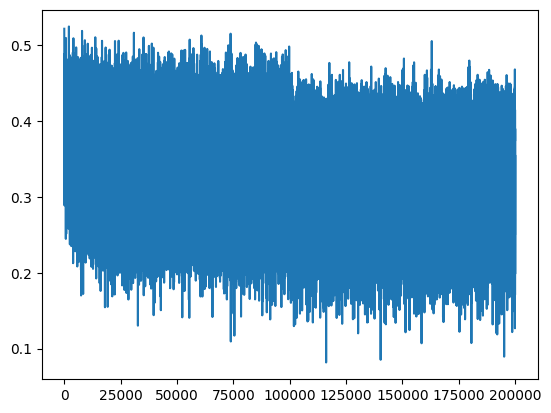

In [ ]:
plt.plot(lossi)

## Hockey stick loss graph

### 1. **Starting Off Good**:
When the lecturer says "we started off good," they're referring to the fact that the initial loss value, right when the training began, was already at a reasonably low point. This is beneficial because it means that the network's initial "guesses" (before any learning has taken place) are already somewhat aligned with what they should be.

### 2. **Hockey Stick Appearance**:
A "hockey stick" shape in a graph refers to a plot that starts flat and then sharply increases (or decreases). In the context of training a neural network, this means that initially, there might be little to no improvement in the loss, and then suddenly, the loss starts decreasing rapidly. This pattern can be indicative of certain challenges during the initial stages of training.

### 3. **Squashing Down the Logits**:
In the initial stages of training, the optimizer can sometimes focus on simply "squashing" or reducing the magnitude of the logits (the outputs before they're passed through a softmax or another activation function) rather than actually rearranging them in a meaningful way. This "squashing" can lead to a rapid decrease in loss, giving the appearance of learning, but it's a superficial gain.

### 4. **Removing Easy Gains**:
By initializing the network weights and biases in a way that avoids the "hockey stick" shape, the lecturer is saying that they've removed these "easy gains." In other words, the network no longer benefits from the superficial improvements that come from just squashing logits. Instead, the improvements in loss now come from genuine learning.

### 5. **Training the Actual Neural Net**:
Without the easy gains from squashing logits, the training process becomes more about the "hard gains" of genuinely training the neural network to understand the data. This means that the improvements we see in the loss are due to the network genuinely getting better at its task, rather than superficial adjustments.

### In Simple Terms:
Imagine you're learning to play a musical instrument, like a guitar. At first, you might quickly improve just by learning to hold the guitar correctly or strumming the strings without missing. These are your "easy gains." But after that, you need to learn chords, scales, and songs, which are your "hard gains." The lecturer's approach to training the neural network is like skipping the step of learning to hold the guitar and going straight to learning chords. It's harder, but it means you're genuinely making progress from the start.

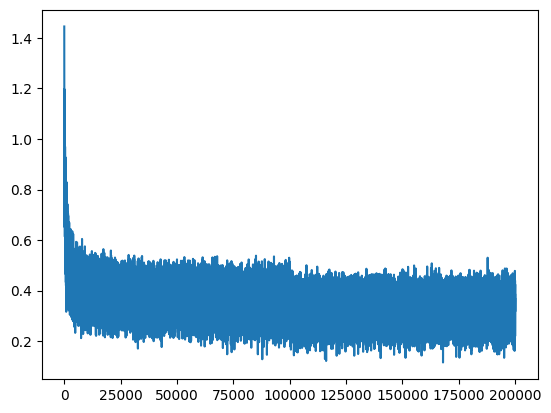

In [ ]:
plt.plot(lossi)

# Problem 2a: Fixing the saturated Tanh

In [ ]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g)
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  break

      0/ 200000: 3.3221


In [ ]:
# we want to look at a histogram of h
# to get a better idea of distribution of h's values
h

tensor([[ 0.8100, -0.8997, -0.9993,  ..., -0.9097, -1.0000,  1.0000],
        [-1.0000, -0.9571, -0.7145,  ...,  0.4898,  0.9090,  0.9937],
        [ 0.9983, -0.3340,  1.0000,  ...,  0.9443,  0.9905,  1.0000],
        ...,
        [-1.0000,  0.9604, -0.1418,  ..., -0.1266,  1.0000,  1.0000],
        [-1.0000, -0.4385, -0.8882,  ..., -0.3316,  0.9995,  1.0000],
        [-1.0000,  0.9604, -0.1418,  ..., -0.1266,  1.0000,  1.0000]],
       grad_fn=<TanhBackward0>)

In [ ]:
h.shape

torch.Size([32, 200])

In [ ]:
h.view(-1)

tensor([ 0.8100, -0.8997, -0.9993,  ..., -0.1266,  1.0000,  1.0000],
       grad_fn=<ViewBackward0>)

In [ ]:
# h.view(-1).tolist() into 200 array list

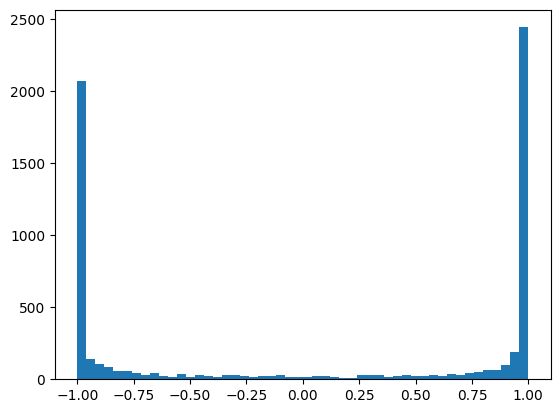

In [ ]:
# 50 bins
# semi-colon supresses output we don't want
plt.hist(h.view(-1).tolist(), 50);

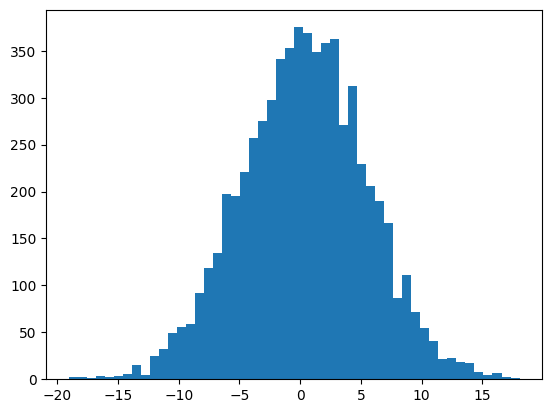

In [ ]:
plt.hist(hpreact.view(-1).tolist(), 50);

##  The hidden activations

## 1. **The Surface is Fine, But There's a Deeper Problem**:
The lecturer starts by saying that while the initial results (the loss values) seem okay, there's a more subtle problem lurking beneath the surface.

### 2. **Issue with Activations**:
The issue isn't with the logits (the raw outputs of the network) but with the hidden activations, denoted as \( H \). These activations are the outputs from the hidden layers of the neural network.

### 3. **Tanh Activation Function**:
The tanh (pronounced "tange") function is an activation function that squashes any input number into a range between -1 and 1. If you imagine the graph of tanh, it looks like an "S" curve, where values in the middle of the curve change more than values at the extremes.

### 4. **Histogram Visualization**:
To understand the distribution of the values inside \( H \), the lecturer visualizes it using a histogram. This histogram provides a count of how many activations fall within various ranges.

### 5. **Extreme Activations**:
The histogram reveals that most of the activation values are at the extremes, -1 and 1. This is a problem because when activations are at the extreme ends of the tanh curve, they are in regions where the function is almost flat. This means the network becomes less sensitive to changes in input, which can hamper learning.

### 6. **Why Are Activations Extreme?**:
The lecturer then checks the values before the tanh function is applied (pre-activations). These pre-activation values are found to be very broad, ranging from -15 to 15, which explains why the tanh function is squashing them to its extremes.

### 7. **Implications for Training**:
For those experienced in training neural networks, seeing many activations at the extremes of the tanh function is concerning. It suggests that during backpropagation (the process by which the network learns), the gradients (values that indicate how to adjust the network to reduce error) might either vanish (become very small) or explode (become very large). Both scenarios can make training difficult and unstable.

### Simple Analogy:
Imagine you're trying to drive a car on a road that has very steep hills. When you're at the very top of a hill (an extreme value), it's hard to get a sense of the road ahead or behind because you're just seeing the peak. It's similar with the tanh function; when values are at the extremes, it's hard for the network to get a sense of how to adjust itself for better performance. The ideal scenario is to have the car (values) positioned on the slopes of the hills, where it can easily move up or down based on the road's conditions (data).

## Vanishing Gradient Problem

There are challenges posed by the tanh activation function during the training of neural networks, especially during backpropagation.

### 1. **Backpropagation**:
Backpropagation is the process by which neural networks learn. It involves computing the gradient of the loss with respect to each parameter (i.e., how much the loss will change if we change a parameter a little bit). This gradient information is then used to adjust the parameters to minimize the loss.

### 2. **Tanh Activation Function**:
The tanh function is an "S"-shaped curve that squashes its input into a range between -1 and 1. The middle of the curve (around 0) is steeper, and the ends (near -1 and 1) are flatter.

### 3. **Local Gradient of Tanh**:
During backpropagation, we compute the local gradient of each operation. For the tanh function, this local gradient is \(1 - \text{tanh}^2(x)\) or \(1 - t^2\) where \( t \) is the output of the tanh function. This means the gradient is highest (equal to 1) when the input is 0 (middle of the curve) and decreases (towards 0) as the output approaches -1 or 1 (ends of the curve).

### 4. **Vanishing Gradient Problem**:
If the output of the tanh function is close to -1 or 1 (in the flat regions), the gradient will be close to 0. This is problematic because when you multiply by this gradient during backpropagation, it effectively "kills" or "vanishes" the gradient. When gradients are very small, the weights of the network barely update, leading to slow or stalled learning.

### 5. **Intuition Behind Vanishing Gradient**:
Imagine you're in a flat valley. No matter which direction you walk, the ground is level, so you have no way of knowing which way is downhill. Similarly, when the gradient is close to 0, the network doesn't know which direction to adjust the weights to minimize the loss.

### 6. **Challenge with Many Neurons in Flat Regions**:
If many neurons' outputs are in the flat regions of the tanh function, the cumulative effect can be severe. The gradients can become extremely small, making learning extremely slow or even halting it.

### Summary:
In essence, while the tanh function is commonly used and has its advantages, it's crucial to be aware of its characteristics and potential pitfalls. If many of the activations are in the flat regions of the tanh curve, it can lead to the vanishing gradient problem, making it challenging for the network to learn effectively. One needs to be mindful of this when training deep neural networks and might consider techniques or alternatives to mitigate these effects.

## When Neurons stop learning

The lecturer is diving deep into the behavior of neurons that use the `tanh` activation function and highlighting potential pitfalls in training neural networks, especially concerning the vanishing gradient problem. Here's a step-by-step breakdown of the key intuitions:

### 1. **Active vs. Flat Regions of Tanh**:
The `tanh` function squashes its input values into a range between -1 and 1. The middle part, close to 0, is the most "active" region where the function is most sensitive to changes in its input. The regions close to -1 and 1 are "flat", meaning the function is less sensitive to input changes.

### 2. **Desired Behavior of Neurons**:
For a neuron to "learn" effectively during training, it's beneficial for its activation (in this case, the output of the `tanh` function) to be in the active region. This ensures that the neuron is sensitive to changes in its input and can adjust its weights appropriately based on the backpropagated gradients.

### 3. **Problem with Neurons in Flat Regions**:
If a neuron's output is consistently in the flat region (close to -1 or 1), it becomes problematic. The gradients during backpropagation for such neurons are close to zero, leading to little or no weight updates. Essentially, these neurons stop learning.

### 4. **Visualizing Neuron Activations**:
The lecturer uses a visualization to show the activations of multiple neurons across different examples. In this visualization, white indicates that a neuron's output is in the flat region (greater than 0.99 in absolute value), and black indicates it's in the active region.

### 5. **Dead Neurons**:
A significant concern is when a neuron's output is always in the flat region, regardless of the input. Such neurons are termed "dead" because they don't contribute meaningfully to the learning process. If a column in the visualization is entirely white, it indicates a dead neuron.

### 6. **Relevance to Training**:
While some neurons being in the flat region occasionally might be okay (as they might shift during training), having many neurons consistently in this region or having dead neurons can hinder the network's overall learning capability.

### Summary:
The main takeaway is the importance of ensuring that neurons in a neural network remain "active" during training, especially when using activation functions like `tanh`. If too many neurons are "dead" or consistently produce outputs in the flat regions, it can stifle the learning process. Monitoring neuron activations and understanding their behavior can guide better network initialization and training practices.

## Common Activation Functions and Dead Neurons

The lecturer is discussing the behavior of various activation functions, specifically how they can cause certain neurons to become "dead" or inactive during training. Let's break this down:

### 1. **Common Activation Functions**:
There are several activation functions used in neural networks: `tanh`, `sigmoid`, `ReLU`, `Leaky ReLU`, and `ELU`, to name a few. Each has its own shape and behavior when it comes to squashing input values.

### 2. **Squashing Non-Linearities**:
Both `tanh` and `sigmoid` are squashing functions, which means they compress their input values into a specific range. For `tanh`, it's between -1 and 1; for `sigmoid`, it's between 0 and 1. Because of their shapes, they have regions where they are very sensitive to changes (steep regions) and regions where they are less sensitive (flat regions).

### 3. **The Problem with Flat Regions**:
Just as we discussed with `tanh`, neurons that consistently output values in the flat regions of their activation function can cause the gradient to vanish during backpropagation. This means these neurons may stop learning.

### 4. **ReLU and Dead Neurons**:
The Rectified Linear Unit (`ReLU`) activation function is different. It outputs the input directly if it's positive; otherwise, it outputs zero. This means if a neuron's input is always negative, its output will always be zero. If this happens, during backpropagation, the gradient for this neuron will always be zero, and it won't learn. Such neurons are termed "dead ReLU neurons."

### 5. **Causes of Dead Neurons**:
A neuron can become dead for various reasons. One common reason is if, during training, the weights of that neuron receive a large update (due to a high learning rate, for instance), pushing the neuron's input to always be in the non-active region. Once a neuron becomes dead, it's hard for it to become active again, as it won't receive any gradient updates.

### 6. **Leaky ReLU and ELU**:
To counteract the problem of dead neurons in ReLU, variations like `Leaky ReLU` and `ELU` have been introduced. `Leaky ReLU` allows a small gradient even when the input is less than zero, which helps prevent neurons from dying. `ELU` (Exponential Linear Unit) also tries to fix this problem but has its own flat regions, so it's not entirely immune.

### 7. **Awareness in Practice**:
It's crucial for practitioners to be aware of these nuances with activation functions. Depending on the architecture and the data, one might observe that certain neurons never activate. Knowing how these functions behave and the potential pitfalls can guide the choice of activation functions and hyperparameters.

### Summary:
Neurons' behavior is highly influenced by the choice of activation functions. While squashing functions like `tanh` and `sigmoid` can cause vanishing gradients in their flat regions, `ReLU` can lead to dead neurons if the inputs are always negative. Understanding these behaviors is vital for training robust and effective neural networks.

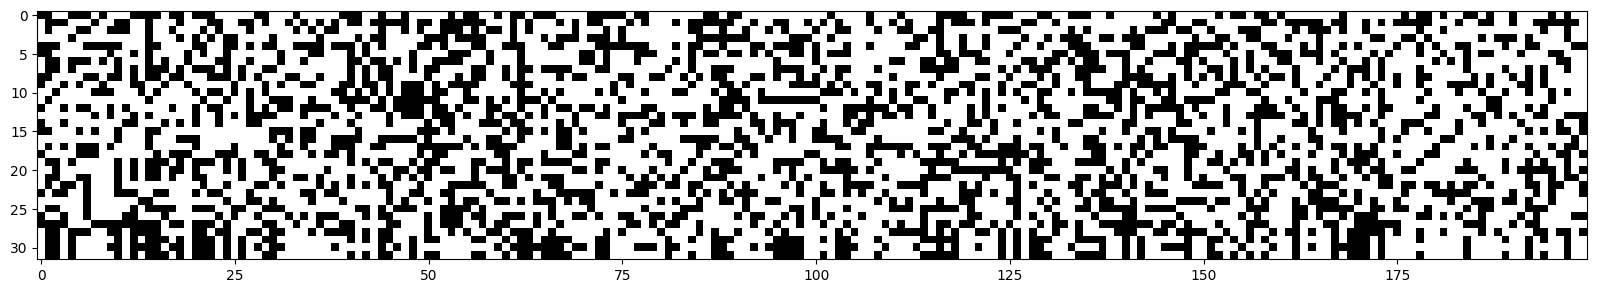

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs() >0.99, cmap="gray", interpolation="nearest")

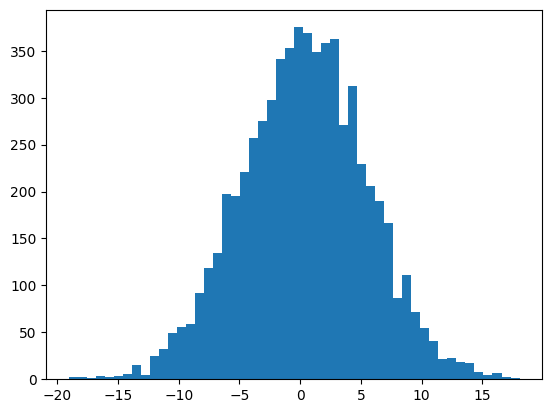

In [ ]:
# this H pre-activation that's flowing to tanh it's it's too extreme, too large
# it's creating a distribution that is too saturated in both sides of the tanh
# it's not something you want because there's less training for these neurons
# because they update less frequently

plt.hist(hpreact.view(-1).tolist(), 50);

In [ ]:

 # in the forward pass
 # hpreact is too far off from 0

 # hpreact = embcat @ W1 + b1

 # solution: we change W1 and B1

n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.2
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  break

      0/ 200000: 3.3135


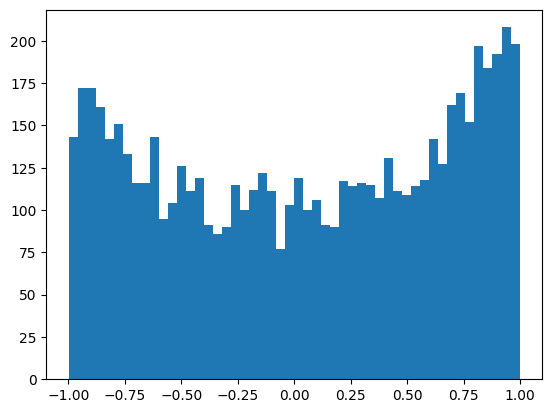

In [ ]:
plt.hist(h.view(-1).tolist(), 50);

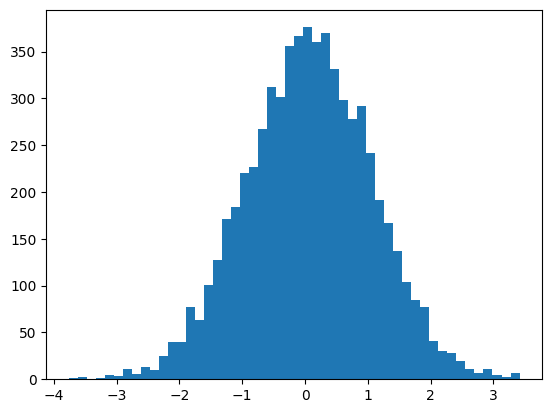

In [ ]:
plt.hist(hpreact.view(-1).tolist(), 50);

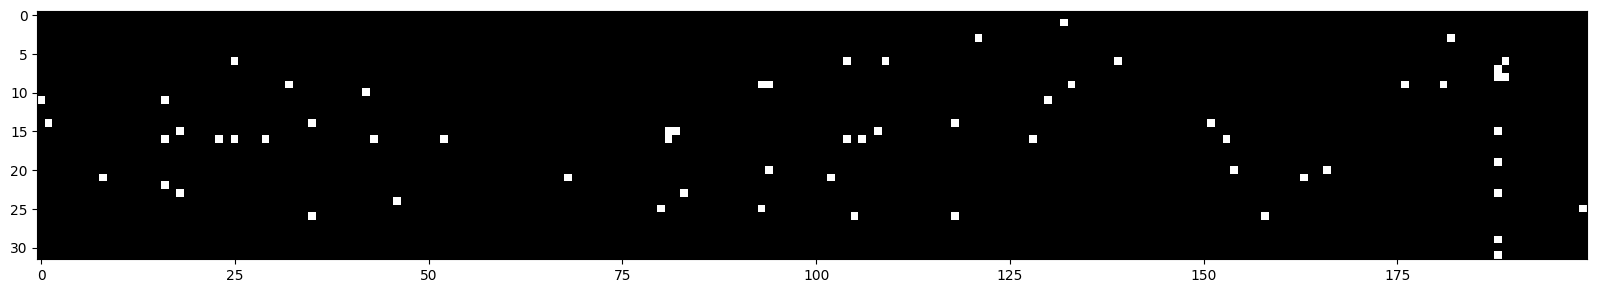

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs() >0.99, cmap="gray", interpolation="nearest")

## Full training with fixed Tanh Layer

In [ ]:
# run full optimization

n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.2
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True


11897


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 3.3135
  10000/ 200000: 2.1648
  20000/ 200000: 2.3061
  30000/ 200000: 2.4541
  40000/ 200000: 1.9787
  50000/ 200000: 2.2930
  60000/ 200000: 2.4232
  70000/ 200000: 2.0680
  80000/ 200000: 2.3095
  90000/ 200000: 2.1207
 100000/ 200000: 1.8269
 110000/ 200000: 2.2045
 120000/ 200000: 1.9797
 130000/ 200000: 2.3946
 140000/ 200000: 2.1000
 150000/ 200000: 2.1948
 160000/ 200000: 1.8619
 170000/ 200000: 1.7809
 180000/ 200000: 1.9673
 190000/ 200000: 1.8295


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0355966091156006
val 2.1026785373687744


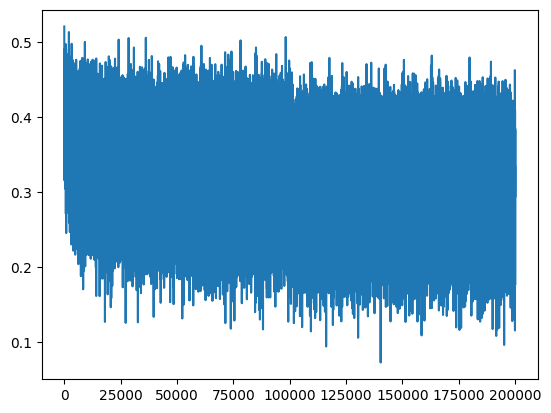

In [ ]:
plt.plot(lossi)

# Problem 2b: Kaiming initialization (getting rid of magic number)

### 1. **The Goal of Initialization**:
When initializing neural networks, especially deep ones, it's crucial to set the weights in such a way that activations (intermediate outputs) within the network neither vanish (become too small) nor explode (become too large). The right initialization ensures a smoother and more effective training process.

### 2. **The Problem with Random Initialization**:
If weights are initialized randomly (like from a standard Gaussian distribution), it can lead to activations that are either too small or too large. As layers increase, these activations can compound, leading to vanishing or exploding gradients during training. This makes it harder for the network to learn.

### 3. **Observing the Activations**:
The lecturer demonstrates this by multiplying an input, `x`, with random weights, `w`. The result, `y`, represents the activations. By examining the standard deviation of `y`, it's observed that it's no longer 1 (like the input), meaning the activations are scaling up or down.

### 4. **Preserving Activation Scale - The Intuition**:
To keep the neural network stable, it's ideal if the activations (like `y`) maintain a similar scale across layers. A good starting point is to aim for activations that have a standard deviation close to 1, similar to the input.

### 5. **Kaiming (or He) Initialization**:
To address this, the Kaiming (or He) initialization method was introduced. The idea is to scale the weights by the inverse square root of the number of input units (often termed "fan-in"). By doing this, the activations' standard deviation remains close to 1, even when multiplied with the weights.

### 6. **Why Square Root of Fan-In?**:
Mathematically, when you work with the variance of the multiplication of the input and weights (both having Gaussian distributions), dividing by the square root of the "fan-in" ensures that the variance (and thus standard deviation) of the output remains stable.

### 7. **Broader Context - Importance in Deep Networks**:
As networks get deeper, having well-behaved activations becomes even more crucial. Poor initialization can lead to a cascade of problems in deeper layers. Hence, methods like Kaiming initialization are valuable tools to set the stage right for effective training.

### Summary:
Proper weight initialization is crucial for training deep neural networks. The Kaiming initialization method ensures that activations maintain a consistent scale across layers by adjusting weights based on the number of input units. This approach sets a foundation for stable and effective training, preventing issues related to vanishing or exploding activations.

tensor(-0.0017) tensor(1.0044)
tensor(-0.0014) tensor(5.5141)


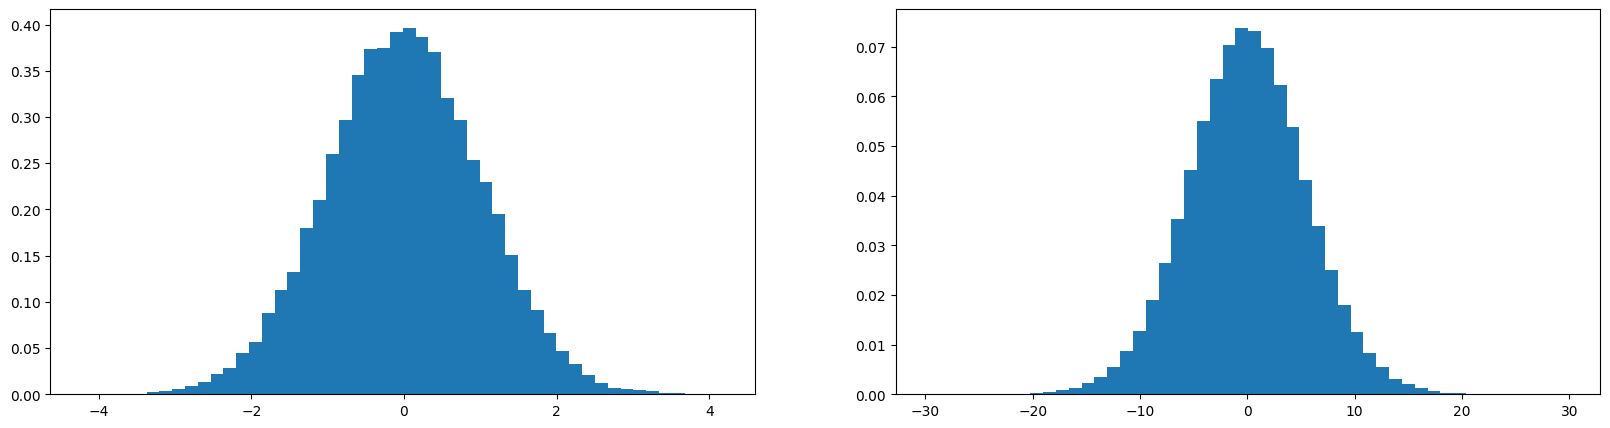

In [ ]:
x = torch.randn(1000,30)
w = torch.randn(30,200)
y = x @ w # pre-activations
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 50, density=True);
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 50, density=True);

tensor(-0.0110) tensor(0.9950)
tensor(0.0009) tensor(0.9919)


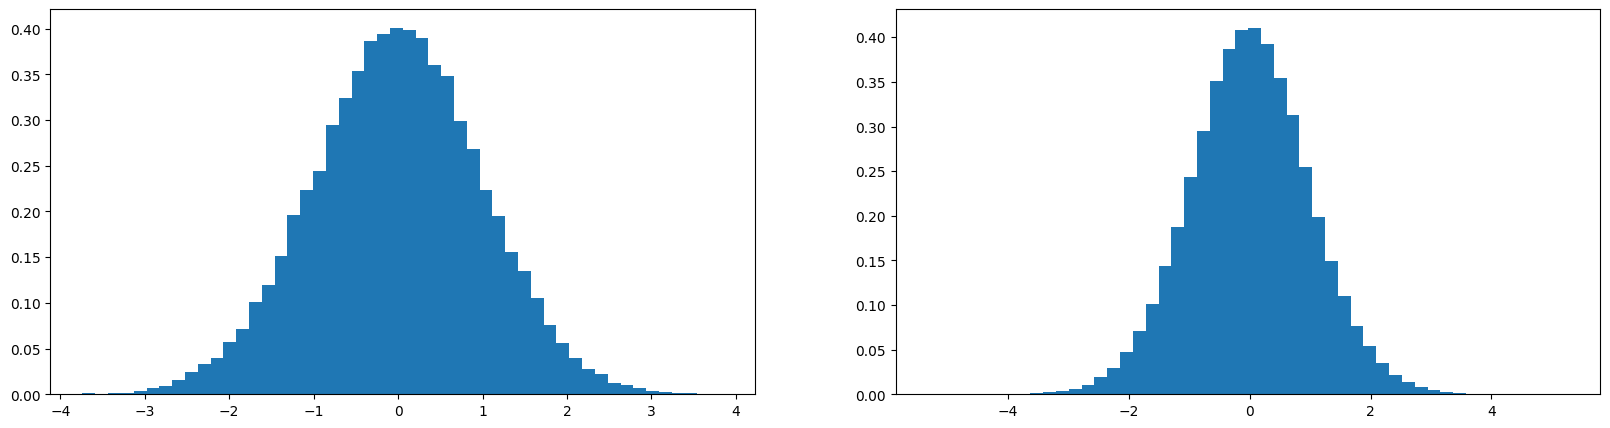

In [ ]:
x = torch.randn(1000,30)
w = torch.randn(30,200) / 30**0.5 # kaiming
y = x @ w
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 50, density=True);
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 50, density=True);

# standard deviation of y is now close to 1.0

## `torch.nn.init.kaiming_normal`

`torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')`

### 1. **The Purpose**:
When we build a neural network, we start with random weights. But not just any random values will do - we want our network to start in a good spot so training is smooth and efficient. That's where Kaiming Normal initialization comes in!

### 2. **The Problem**:
Imagine you're trying to listen to a song, but the volume is either too low or too loud. It wouldn't be a pleasant experience, right? Similarly, if our neural network's weights are too small or too large, the network will struggle to learn from data. It might be too slow, or it might not work at all!

### 3. **The Name - Kaiming**:
The method is named after Kaiming He, a researcher who was among the first to identify and solve this problem specifically for deep networks using ReLU (Rectified Linear Unit) activations.

### 4. **The Intuition**:
Kaiming Normal initialization aims to keep the scale (or spread) of activations consistent across layers. It's like tuning the volume of each song in a playlist so that you don't have to adjust your headphones every time a new song comes on.

### 5. **The Math (Simplified)**:
Instead of just picking random weights, Kaiming Normal adjusts them based on the number of input connections a neuron has (called "fan-in"). It takes random values but scales them by the square root of the fan-in. This way, the weights are just right, neither too small nor too large.

### 6. **Why "Normal"?**:
"Normal" refers to the type of random distribution used. It's bell-shaped, like a hill, and is also known as the Gaussian distribution. So, Kaiming Normal means we're picking weights from this hill-shaped curve and then adjusting them with our special scaling.

### 7. **In PyTorch**:
PyTorch provides this as a built-in function, making it easy for users to apply this beneficial initialization method to their networks.

### Summary:
Kaiming Normal initialization in PyTorch is like a smart DJ who adjusts the volume of each song in a playlist, ensuring a smooth listening experience. For our neural networks, it ensures the weights start off just right, making training smoother and more effective!

## The significance of "gain" in the initialization of neural networks.

### 1. **The Goal**:
In neural networks, we want the activations (outputs of neurons) to have a consistent distribution across layers. This helps in stable and efficient training. To achieve this, we need to initialize our weights in a specific way.

### 2. **Forward and Backward Pass**:
- **Forward Pass**: This is when we input data and it moves through the network, getting processed by each layer.
- **Backward Pass**: This is the process of backpropagation, where we calculate gradients based on the difference between the predicted and actual values, and then adjust the weights.

Both forward and backward passes should have well-behaved activations and gradients for effective learning.

### 3. **The Problem with Non-linearities**:
Non-linear functions like ReLU and Tanh can squash or stretch the activations. For instance:
- **ReLU**: Anything negative becomes zero, effectively squashing it.
- **Tanh**: It squishes values into a range between -1 and 1.

Because of these properties, they can change the scale (spread) of our activations.

### 4. **Introducing the Gain**:
To counteract the effects of non-linearities, we introduce a "gain". Think of gain as a volume knob. If a non-linearity tends to squash the values, we turn the volume up (increase the gain). If it stretches the values, we turn the volume down (decrease the gain).

### 5. **Why Different Gains for Different Functions?**:
Each non-linearity has its own behavior. For example:
- **Linear Function**: Doesn't squash or stretch, so gain is 1 (no change needed).
- **ReLU**: Because half of the output (negative side) becomes zero, we need a higher gain. Hence, gain is \($\sqrt{2}$\).
- **Tanh**: It squeezes values, so it has a different advised gain, which is \(5/3\).

The exact values of these gains come from mathematical analysis and empirical studies to find what works best in practice.

### 6. **Summary of Gain**:
The gain is a corrective factor applied during weight initialization. It ensures that, after passing through a non-linearity, the spread of our activations remains consistent. This helps in keeping the training stable and prevents issues like vanishing or exploding gradients.

In simpler words, just like you might adjust your car's speed based on the road condition, the gain adjusts the weights based on the type of non-linearity, ensuring a smooth journey for the data as it moves through the network.

## The evolution of deep learning practices around the initialization of neural networks

### 1. **The Past: Delicate Balancing Act**
Up to 2015, training deep neural networks was a very delicate process. If not set up correctly:
- The networks might not train at all.
- They could face issues like vanishing or exploding gradients, especially in very deep networks.

### 2. **The Importance of Initialization**
- Proper initialization was crucial. It ensured that activations and gradients had a consistent spread across layers, promoting stable and efficient training.
- Activations and gradients were closely monitored to ensure they remained within a desired range.
- Different non-linear functions required precise calibration of weights, hence the need for different "gains".

### 3. **Modern Innovations: Making Life Easier**
Over the years, several innovations have made the training of deep neural networks more robust and less finicky:
- **Residual Connections**: These are shortcuts or skip connections in a network that allow gradients to flow more easily, especially in very deep networks.
- **Normalization Techniques**: Layers like Batch Normalization, Layer Normalization, and Group Normalization ensure activations maintain a consistent mean and variance. They act like regulators, keeping activations in check.
- **Advanced Optimizers**: Instead of just using simple Stochastic Gradient Descent (SGD), newer optimizers like RMSprop and Adam adjust learning rates dynamically, providing more stable and faster convergence.

### 4. **Practical Advice**
Despite all the intricacies and innovations, the lecturer's practical advice boils down to a simple strategy for weight initialization: normalize the weights by the square root of the "fan in" (the number of input units in the weight tensor).

### 5. **Up Next: Batch Normalization**
The lecturer hints at diving deeper into Batch Normalization, one of the pivotal innovations in deep learning. This technique not only helps in stabilizing the activations but also allows for higher learning rates, speeding up the training process.

### In Summary:
Training deep neural networks used to be a highly delicate process, with a strong emphasis on the precise initialization of weights. However, with modern techniques and innovations, the process has become more forgiving and robust. Still, having a good initialization strategy, like normalizing by the square root of the fan-in, remains a recommended practice.

In [ ]:
torch.randn(10000).std()

tensor(1.0087)

In [ ]:
(torch.randn(10000)*0.2).std()

tensor(0.2013)

In [ ]:
# std changes by whatever you multiply

## Full Training with Kaiming Initialization

In [ ]:
# add kaiming init to W1 (5/3)/((n_embd * block_size)**0.5)

n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0


parameters = [C, W1, W2, b1, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 3.3179
  10000/ 200000: 2.1910
  20000/ 200000: 2.3270
  30000/ 200000: 2.5396
  40000/ 200000: 1.9468
  50000/ 200000: 2.3331
  60000/ 200000: 2.3852
  70000/ 200000: 2.1173
  80000/ 200000: 2.3159
  90000/ 200000: 2.2010
 100000/ 200000: 1.8591
 110000/ 200000: 2.0881
 120000/ 200000: 1.9389
 130000/ 200000: 2.3913
 140000/ 200000: 2.0949
 150000/ 200000: 2.1458
 160000/ 200000: 1.7824
 170000/ 200000: 1.7249
 180000/ 200000: 1.9752
 190000/ 200000: 1.8614


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0376641750335693
val 2.106989622116089


# Batch Normalization

Batch Normalization (BN) is a technique used in deep learning to help stabilize the activations of neurons within a network and improve the training process. Let's break it down step-by-step:

### 1. **The Problem**
- When training deep neural networks, the distribution of each layer's input can change as the weights of the previous layers change.
- This phenomenon is known as "internal covariate shift", and it can slow down training and make it harder to choose a suitable initialization and learning rate.

### 2. **The Solution: Batch Normalization**
- Batch Normalization addresses this problem by normalizing the input of each layer in a mini-batch.
- It scales and shifts the activations so that they have a mean of zero and a standard deviation of one.

### 3. **How It Works**
- During training, for each mini-batch, BN calculates the mean and standard deviation of the activations for each feature.
- It then subtracts the mean and divides by the standard deviation, normalizing the activations.
- Finally, BN introduces two learnable parameters for each feature: a scale parameter and a shift parameter. These parameters allow the network to undo the normalization if it's not beneficial.

### 4. **Benefits**
- **Stabilizes Activations**: BN ensures that the activations stay within a stable range throughout the network, preventing vanishing or exploding gradients.
- **Faster Convergence**: BN allows the use of higher learning rates, leading to faster convergence.
- **Less Sensitive to Initialization**: BN makes the network less sensitive to weight initialization, reducing the need for careful calibration.
- **Regularization Effect**: BN introduces a slight noise during training, which can have a regularization effect, reducing the need for other regularization techniques like dropout.

### 5. **Training vs. Inference**
- During training, the mean and standard deviation are calculated for each mini-batch.
- During inference (testing), a running average of the mean and standard deviation from the training phase is used.

### In Summary:
Batch Normalization is a technique that normalizes the activations of each layer within a mini-batch. It helps stabilize the training process, enables faster convergence, and reduces sensitivity to weight initialization. It's like a "regulator" that ensures the activations don't get too high or too low as the network learns.

In [ ]:
# BN paper gives formula. subtract mean and divide by std

# hpreact = (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True)

In [ ]:
hpreact.shape

torch.Size([32, 200])

In [ ]:
hpreact.mean(0, keepdim=True).shape

torch.Size([1, 200])

In [ ]:
hpreact.std(0, keepdim=True).shape

torch.Size([1, 200])

## Full training with Batch Normalization

In [ ]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

parameters = [C, W1, W2, b1, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

12297


In [ ]:
# add batch normalization

# change hpreact
# (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True)
# bngain
# bnbias

max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True) + bnbias
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())


      0/ 200000: 3.3147
  10000/ 200000: 2.1984
  20000/ 200000: 2.3375
  30000/ 200000: 2.4359
  40000/ 200000: 2.0119
  50000/ 200000: 2.2595
  60000/ 200000: 2.4775
  70000/ 200000: 2.1020
  80000/ 200000: 2.2788
  90000/ 200000: 2.1862
 100000/ 200000: 1.9474
 110000/ 200000: 2.3010
 120000/ 200000: 1.9837
 130000/ 200000: 2.4523
 140000/ 200000: 2.3839
 150000/ 200000: 2.1987
 160000/ 200000: 1.9733
 170000/ 200000: 1.8668
 180000/ 200000: 1.9973
 190000/ 200000: 1.8347


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True) + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0668270587921143
val 2.104844808578491


## Adding Batch Normalization (BN)

### 1. **Why Add Batch Normalization?**
- When training deep neural networks, the distribution of each layer's input can change as the weights of the previous layers change, making training harder.
- Batch Normalization addresses this issue by normalizing the input of each layer for each mini-batch, helping to stabilize activations and improve the training process.

### 2. **How Batch Normalization Works in the Network**
- First, BN calculates the mean and standard deviation of the activations for each feature in the mini-batch.
- It then subtracts the mean and divides by the standard deviation, normalizing the activations to have a mean of zero and a standard deviation of one.

### 3. **Scaling and Shifting with BN**
- In addition to normalizing the activations, BN introduces two learnable parameters for each feature: a scale parameter (gain) and a shift parameter (bias).
- These parameters allow the network to undo the normalization if it's not beneficial or adjust the activations as needed.
- In the code, `bngain` is initialized to ones, and `bnbias` is initialized to zeros. At initialization, each neuron's firing values in the batch will be exactly unit Gaussian due to the normalization.
- During optimization, the network can back-propagate to `bngain` and `bnbias` and change them, giving the network the ability to adjust the distribution of the activations as needed.

### 4. **Implementing Batch Normalization in the Code**
- In the code, `hpreact` represents the pre-activations of the hidden layer.
- The normalization is applied to `hpreact` by subtracting the mean (`hpreact.mean(0, keepdim=True)`) and dividing by the standard deviation (`hpreact.std(0, keepdim=True)`).
- The normalized `hpreact` is then scaled by `bngain` and shifted by `bnbias`, resulting in the final normalized and adjusted activations.
- The BN parameters `bngain` and `bnbias` are included in the list of parameters that will be updated during training.

### 5. **Training the Network with Batch Normalization**
- During training, the network updates the weights and biases as well as the BN parameters `bngain` and `bnbias` through back-propagation.
- This allows the network to adjust the distribution of the activations as needed to improve the training process.

### In Summary:
Batch Normalization is a technique that normalizes the activations of each layer within a mini-batch. It helps stabilize the training process and improve the performance of the network. In addition to normalization, BN introduces scale and shift parameters that allow the network to adjust the activations as needed during training.

## Challenges with Batch Normalization

### 1. **Challenges with Batch Normalization (BN):**
- In traditional deep learning, we processed each example in a batch independently. However, BN couples examples in a batch together mathematically, which is unnatural and leads to some challenges.
- The activations for a single input example will jitter or change slightly depending on the other examples in the batch. This is because the mean and standard deviation used for normalization are affected by all examples in the batch.

### 2. **Surprising Benefits of BN:**
- Despite the challenges, the jitter introduced by BN turns out to be a good thing in neural network training.
- The jitter effectively acts as a form of data augmentation and regularizes the neural network.
- It makes it harder for the network to overfit to specific examples by introducing noise and padding out the inputs.

### 3. **Attempts to Replace BN:**
- Due to the issues with coupling examples in a batch, people have tried to replace BN with other normalization techniques that don't couple examples.
- Alternatives include layer normalization, instance normalization, and group normalization.
- However, BN has proven to be very effective, and its regularizing effect makes it hard to remove entirely.

### 4. **Deploying a Neural Network with BN:**
- After training a neural network with BN, we want to deploy it to make predictions on individual examples.
- However, BN expects batches as input, so how do we handle a single example?
- The proposal in the BN paper is to calculate and set the batch mean and standard deviation once over the training set after training. This allows us to use BN on individual examples.

### 5. **Calibrating BN Statistics:**
- In the code, the lecturer wrote a function to calibrate the BN statistics.
- The function takes the training set, gets the pre-activations for every training example, and estimates the mean and standard deviation over the entire training set.
- These statistics are then used for BN when making predictions on individual examples.

### In Summary:
Batch Normalization is a powerful technique that normalizes the activations of each layer within a mini-batch. It introduces some challenges due to coupling examples in a batch, but it has a surprising regularizing effect that makes it hard to replace. After training a neural network with BN, we can calibrate the BN statistics on the training set to make predictions on individual examples.

In [ ]:
# calibrate the batch norm at the end of training

with torch.no_grad():
  # pass the training set through
  emb = C[Xtr]
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 # + b1
  # measure the mean/std over the entire training set
  bnmean = hpreact.mean(0, keepdim=True)
  bnstd = hpreact.std(0, keepdim=True)

In [ ]:
# hpreact = bngain * (bnmean) / bnstd + bnbias

@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  hpreact = bngain * (hpreact - bnmean) / bnstd + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.066890239715576
val 2.1049015522003174


## Full Training with Batch Normalization with running stats

In [ ]:
# we don't want an extra stage at the end of training
# we keep a running stats instead

In [ ]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

parameters = [C, W1, W2, b1, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

12297


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  # Linear layer
  hpreact = embcat @ W1 + b1 # hidden layer pre-activation
  # BatchNorm layer
  # -------------------------------------------------------------
  bnmeani = hpreact.mean(0, keepdim=True)
  bnstdi = hpreact.std(0, keepdim=True)
  hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias
  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi
  # -------------------------------------------------------------
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 3.3147
  10000/ 200000: 2.1984
  20000/ 200000: 2.3375
  30000/ 200000: 2.4359
  40000/ 200000: 2.0119
  50000/ 200000: 2.2595
  60000/ 200000: 2.4775
  70000/ 200000: 2.1020
  80000/ 200000: 2.2788
  90000/ 200000: 2.1862
 100000/ 200000: 1.9474
 110000/ 200000: 2.3010
 120000/ 200000: 1.9837
 130000/ 200000: 2.4523
 140000/ 200000: 2.3839
 150000/ 200000: 2.1987
 160000/ 200000: 1.9733
 170000/ 200000: 1.8668
 180000/ 200000: 1.9973
 190000/ 200000: 1.8347


In [ ]:
bnmean

tensor([[-2.3148,  0.6874, -0.9136,  0.9966,  1.0880,  1.0840,  1.7472, -2.1107,
          0.5818,  1.4375, -1.6466, -2.7301, -0.4766, -0.1641, -0.0858, -1.1704,
          0.6867, -2.6103, -0.0924,  1.6207, -0.7664, -0.3184,  0.0414,  0.6149,
          1.1046,  0.2279,  2.0388,  0.5843,  0.8445,  1.7754, -0.3646, -0.8378,
         -0.0896, -0.5023, -0.3711, -1.0608, -0.0749,  0.3473, -0.5914,  0.9716,
         -0.4422, -1.3040, -0.3001, -0.2147,  0.6885,  0.6893,  2.0853, -0.7506,
          2.3778,  1.8862,  0.8296,  0.2895,  1.8993,  0.4668,  0.6838, -1.8916,
         -0.0522,  0.4209,  1.3688, -0.9079, -0.4528,  1.1846,  0.5669,  0.6121,
          1.5833,  1.2314, -1.0180,  2.1523, -0.6460,  0.0949, -0.2969, -0.4722,
          0.9620, -1.0408, -2.9998,  0.6501,  1.4310, -0.1545,  0.0938,  0.5273,
          0.2381,  1.2512,  2.0559,  0.6612,  0.0664, -0.0787, -1.6763,  0.2953,
          2.2552, -0.0272, -0.6879,  1.4155, -0.8440, -1.2223, -1.0225,  0.2299,
          0.2184, -0.3140,  

In [ ]:
bnmean_running

tensor([[-2.3539,  0.6872, -0.9001,  1.0159,  1.0894,  1.0862,  1.7389, -2.1357,
          0.5608,  1.4246, -1.6445, -2.7426, -0.4861, -0.1510, -0.0687, -1.1550,
          0.6891, -2.6399, -0.1283,  1.6240, -0.7732, -0.2865,  0.0467,  0.6119,
          1.1172,  0.2433,  2.0542,  0.5778,  0.8515,  1.7729, -0.3741, -0.8385,
         -0.0831, -0.5198, -0.3816, -1.0698, -0.0781,  0.3370, -0.5769,  0.9935,
         -0.4507, -1.3313, -0.2895, -0.2299,  0.6877,  0.6936,  2.0835, -0.7759,
          2.3804,  1.8613,  0.8118,  0.2735,  1.8802,  0.4704,  0.6656, -1.8962,
         -0.0420,  0.4356,  1.3924, -0.8906, -0.4676,  1.1688,  0.5539,  0.6000,
          1.5853,  1.2103, -1.0171,  2.1422, -0.6330,  0.1071, -0.2926, -0.4831,
          0.9506, -1.0144, -2.9925,  0.6268,  1.4404, -0.1574,  0.0955,  0.5159,
          0.2487,  1.2400,  2.0104,  0.6695,  0.0768, -0.0851, -1.6767,  0.2964,
          2.2374, -0.0100, -0.6669,  1.4356, -0.8431, -1.2317, -1.0220,  0.2201,
          0.1928, -0.3261,  

In [ ]:
# bnmean and bnmean_running are not identical but close.
# we will use the bnmean_running and ditch the extra bnmean stage

In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1  + b1
  hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.066591501235962
val 2.1050572395324707


## Bias in the Batch Normalization layer

### 1. **Bias in the Hidden Layer Pre-activation:**
- In traditional neural networks, we add a bias to the hidden layer's pre-activation. The pre-activation is the result of the multiplication of input values with the weight matrix.
- The bias is typically a small constant that is added to the pre-activation to shift it.

### 2. **Bias Becomes Useless with Batch Normalization:**
- However, when using Batch Normalization (BN), the bias in the hidden layer pre-activation becomes useless.
- This is because BN subtracts the mean of the pre-activations in the batch from each pre-activation.
- As a result, any constant bias that was added will be subtracted out, having no effect on the rest of the calculation.

### 3. **Bias Gradient is Zero:**
- In the code, the lecturer points out that the gradient of the bias (b1.grad) is actually zero.
- This is because the bias is being subtracted out and doesn't have any effect, so its gradient is zero.

### 4. **Use BN Bias Instead:**
- Instead of using a bias in the hidden layer pre-activation, we can use the bias in the BN layer.
- The BN layer has its own bias, which is used to shift the normalized pre-activations.
- This BN bias is more meaningful and has an effect on the rest of the calculation.

### 5. **Remove Bias from Weight Layer:**
- When using BN layers, we can remove the bias from the weight layer before it (like a linear layer or convolutional layer).
- There's no need to have a bias in the weight layer before the BN layer, as it will be subtracted out anyway.

### In Summary:
When using Batch Normalization, the traditional bias in the hidden layer pre-activation becomes useless because it gets subtracted out. Instead, we should use the bias in the Batch Normalization layer, which is more meaningful and has an effect on the rest of the calculation. There's no need to have a bias in the weight layer before the BN layer.

## Summary of Batch Normalization

Batch Normalization (BN) is a powerful technique for controlling the activation statistics within a neural network. It's a common practice to intersperse BN layers throughout the architecture, typically placed after layers that involve multiplication operations, such as linear or convolutional layers.

The BN layer has learnable parameters for gain and bias, which are optimized through backpropagation. Additionally, it maintains two buffers: a running mean and a running standard deviation of the input activations. These buffers are not updated through backpropagation; instead, they are updated using a running mean calculation.

During the forward pass, BN calculates the mean and standard deviation of the input activations within the batch. It then standardizes the activations to have zero mean and unit variance. Subsequently, the standardized activations are scaled by the learned gain and shifted by the learned bias.

The running mean and standard deviation buffers serve a critical role during inference. By keeping track of these statistics during training, we avoid the need to recompute them at test time. Moreover, this allows us to process individual examples during inference, as we can use the stored statistics for normalization.

In summary, BN is a relatively complex layer that plays a crucial role in stabilizing the training of deep neural networks by controlling the statistics of activations. It involves learnable parameters for scaling and shifting activations, as well as buffers for maintaining running statistics to facilitate efficient inference.

# Aside: Example from Resnet

## The Bottleneck block

The Bottleneck block is a fundamental building block in the ResNet architecture, specifically designed to address the increased computational burden of deeper networks. It's particularly used in deeper variants of ResNet, such as ResNet-50, ResNet-101, and ResNet-152.

The Bottleneck block consists of three consecutive convolutional layers, which successively reduce the number of channels, perform the main processing, and then restore the original channel depth. This sequence of operations forms a "bottleneck" structure, where the middle layer has fewer channels and is responsible for the main computations. This design aims to reduce the computational cost while maintaining the network's representational capacity.

[resnet pytorch github repo](https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py)

The standard sequence of operations in a Bottleneck block is as follows:

1. The first layer is a 1x1 convolution that reduces the input channel depth to a smaller number, typically by a factor of 4. This operation is followed by batch normalization and a ReLU activation.
2. The second layer is a 3x3 convolution that operates on the reduced channel depth, performing the primary feature extraction. This layer also includes batch normalization and a ReLU activation.
3. The third layer is another 1x1 convolution that restores the channel depth to its original value, followed by batch normalization.

The output of the third layer is then element-wise added to the original input, forming a residual connection. Finally, a ReLU activation is applied to the sum.

The Bottleneck block is a powerful design that enables the training of very deep networks with reduced computational complexity. By using 1x1 convolutions to decrease and then restore the channel depth, the block significantly reduces the number of parameters and computations involved in the 3x3 convolution. This design allows for the construction of deeper models without a significant increase in computational cost, enabling the extraction of more complex and hierarchical features from the input data.

---

## A simplified explanation of the Bottleneck block in ResNet:

Imagine a factory assembly line with multiple stations. At each station, workers perform specific tasks to assemble a product. Some tasks are more complex and time-consuming, while others are simpler and faster. If you want to speed up the assembly line, you need to focus on optimizing the more complex tasks.

The Bottleneck block in ResNet works similarly. It's a building block designed to make deep neural networks more efficient. In a deep network, some layers have many channels (or "workers"), making them computationally expensive. The Bottleneck block addresses this by temporarily reducing the number of channels, performing the main processing, and then restoring the original channel depth.

Here's how the Bottleneck block works step-by-step:

1. **Channel Reduction**: The first layer of the block is like a "manager" who assigns a smaller team to handle a specific task. It reduces the number of channels (or "workers") using a 1x1 convolution, followed by batch normalization and a ReLU activation. This step makes the next layer more efficient by temporarily reducing the number of channels it has to work with.
2. **Main Processing**: The second layer is the "main task force" that performs the primary feature extraction. It operates on the reduced channel depth using a 3x3 convolution, followed by batch normalization and a ReLU activation. This layer can now work more efficiently since it has fewer channels to process.
3. **Channel Restoration**: The third layer is like the "manager" reassembling the original team after the task is done. It restores the channel depth to its original value using a 1x1 convolution, followed by batch normalization.

Finally, the output of the third layer is added to the original input, forming a "shortcut connection." This step helps the network learn more effectively by allowing information to flow more easily through the layers. Then, a ReLU activation is applied to the sum.

In summary, the Bottleneck block in ResNet is like an optimized assembly line in a factory. It temporarily reduces the number of channels to make the main processing more efficient, and then restores the original channel depth. This design allows for deeper and more powerful networks without significantly increasing the computational cost.

# Quick Summary of key ideas


**Neural Network Activations & Gradients:**
- Keeping track of activations and gradient statistics is crucial, especially as your network's depth increases.
  
**Distribution at the Output Layer:**
- Overconfident mispredictions arise when activations get skewed. Addressing these anomalies ensures a smoother loss function and prevents the network from doing wasteful work.

**Desired Activations:**
- A neural network's health is largely predicated on the activation distributions. Ideally, you want Gaussian-like activations throughout the network.

**Weight Initialization:**
- Properly scaling weights and biases during initialization is key. However, as networks grow deeper and more complex, precisely controlling these parameters becomes a Herculean task.

**Enter Batch Normalization:**
- The inception of normalization layers, especially Batch Normalization, was a game-changer. By standardizing activations, these layers contributed significantly to the stabilization of deep neural networks.
- Batch normalization, though powerful, is complex. It involves:
  - Centering activations using batch statistics.
  - Introducing learnable parameters (gain and bias).
  - Estimating running statistics for inference without being reliant on batch statistics.

**Batch Normalization's Double-Edged Sword:**
- While it's been instrumental, Batch Normalization is not without its pitfalls. The coupling of training samples can be both a blessing (due to its regularizing effect) and a curse (leading to bugs and complexities).
  
**Alternatives to Batch Normalization:**
- The community has explored alternatives like Group Normalization and Layer Normalization, which address some of Batch Normalization's shortcomings. While BatchNorm had its heyday post its 2015 introduction, newer normalization techniques are gaining traction.

---

In essence, while the journey through neural network activations and normalizations has been complex, it's clear that understanding and controlling activations is foundational to building robust and deep neural networks.

# Pytorch-ifying the code

## Pytorch's `torch.nn.Linear`


**What is `torch.nn.Linear`?**
- `torch.nn.Linear` is a module provided by PyTorch that represents a basic linear transformation, which performs a matrix multiplication of the input and the weights, followed by adding a bias.

**Step-by-step Explanation:**

1. **Initialization**:
   - When you create an instance of `torch.nn.Linear`, you need to specify two main parameters: `in_features` and `out_features`.
   - `in_features`: The number of input features (or neurons).
   - `out_features`: The number of output features (or neurons).
   - Once initialized, the module will have two parameters: `weight` and `bias`.
     - `weight` is of shape `(out_features, in_features)`.
     - `bias` is of shape `(out_features)`.

2. **Forward Pass**:
   - Given an input tensor `x` of shape `(batch_size, in_features)`, the module computes the output `y` using the equation:
   $$
     [
     y = x \times \text{weight}^T + \text{bias}
     ]
  $$
   - Here, $\times$ denotes matrix multiplication, and `^T` denotes the transpose operation.

3. **Training**:
   - During training, the `weight` and `bias` parameters are updated using backpropagation to minimize the loss.

4. **Usage**:
   - This layer is commonly used in feed-forward neural networks and can be combined with non-linear activation functions (like ReLU) to introduce non-linearity.

**In Simpler Terms**:
Imagine you're the manager of a team. Each member of your team has a specific role and responsibility. When a task (or input) comes in, each member looks at the task and provides their own output based on their role. You then gather all the outputs, combine them (using the weights), and then add some final adjustments (bias) to produce the final result. `torch.nn.Linear` is like this process, where each neuron (or team member) gives its own output based on the input and its weight, and then a bias is added to produce the final result.

## Initialization process of `torch.nn.Linear`

**1. Parameters in `torch.nn.Linear`:**
- Every instance of `torch.nn.Linear` has two primary parameters: `weight` and `bias`.

**2. Initialization Mechanism:**
- By default, PyTorch uses a specific technique to initialize the `weight` parameter of the linear layer.

**3. The 'Fan-in' Concept:**
- 'Fan-in' refers to the number of input features (or neurons) to the linear layer. It's used to determine the scale at which weights should be initialized.

**4. Scale Determination:**
- The scale is calculated as the inverse of the square root of the fan-in. Mathematically, this is:
  $$
  \text{scale} = \frac{1}{\sqrt{\text{fan-in}}}
  $$
  This ensures that the weights are initialized to values that are inversely proportional to the square root of the number of input features.

**5. Distribution Type for Weight Initialization:**
- Instead of using a normal (Gaussian) distribution, PyTorch by default uses a uniform distribution to initialize the weights.
- This means that the weights are drawn from a uniform distribution that ranges from $- \sqrt{\text{scale}}$ to $+ \sqrt{\text{scale}}$.

**6. Reasoning Behind the Initialization:**
- The underlying motivation for this specific weight initialization is to ensure that when the input data has a Gaussian distribution, the output of the linear layer will also be roughly Gaussian.
- This kind of initialization helps in stabilizing the training process, especially for deep neural networks.

**In Simple Terms**:
Think of `torch.nn.Linear` as a mixer that blends various ingredients (input features) to produce a dish (output). To ensure that the dish tastes good (has a stable training process), the mixer's blades (weights) need to be set at a certain sharpness level (initialization). The sharpness level is determined by looking at the number of ingredients being used (`fan-in`). PyTorch ensures this sharpness is just right by setting it using a uniform distribution, keeping in mind the number of ingredients. This ensures that every time you blend, the output dish has a consistent taste (Gaussian distribution).

## Pytorch's `torch.nn.BatchNorm1d`

**1. What is `torch.nn.BatchNorm1d`?**
- `torch.nn.BatchNorm1d` stands for 1-dimensional Batch Normalization. It's a module in PyTorch designed to normalize the activations of a layer during training.

**2. Why do we need Batch Normalization?**
- During training, the distribution of each layer's input can change as the weights of the preceding layers change. This phenomenon is known as "internal covariate shift." Batch Normalization mitigates this by ensuring that inputs to layers are somewhat standardized throughout training.

**3. The Mechanics of `torch.nn.BatchNorm1d`:**
- For each feature, the module computes the mean and variance across the batch dimension.
- It then normalizes the activations using the formula:

$$
\text{normalized activation} = \frac{\text{activation} - \text{mean}}{\sqrt{\text{variance} + \epsilon}}
$$

Where \( $\epsilon$ \) is a small number added for numerical stability.

**4. Learnable Parameters:**
- After normalization, the module scales and shifts the data using two learnable parameters: `gamma` (scale) and `beta` (shift). The formula is:

$$
\text{output} = \text{normalized activation} \times \text{gamma} + \text{beta}
$$

- This allows the network to undo the normalization if it finds it unnecessary.

**5. During Training vs. During Inference:**
- During training, the mean and variance are computed from the current batch. These batch statistics are then used to normalize the activations.
- However, at inference (or evaluation) time, the module uses running statistics (running mean and running variance) computed during training. This provides a more stable normalization for unseen data.

**6. Momentum and Affine Parameters:**
- `torch.nn.BatchNorm1d` has a momentum parameter. This isn't the same momentum you'd find in optimization algorithms. Here, it's used to update the running mean and running variance.
- The module also has an `affine` parameter. If set to `True`, it includes the learnable scaling and shifting parameters (`gamma` and `beta`). If set to `False`, the module will not learn these parameters, and they'll be fixed.

**In Simple Terms**:
Imagine you're cooking with ingredients from various sources. Some ingredients might be too salty or too sweet. `torch.nn.BatchNorm1d` acts like a chef who tastes and adjusts these ingredients to have a consistent taste before they're used in cooking. During the cooking (training) process, the chef remembers the average taste adjustments made (running statistics) and uses them when serving the dish to guests (inference), ensuring a consistent taste even if the ingredients slightly change. The chef can also add some special flavors (using `gamma` and `beta`) if needed to make the dish even better.

## Initial Code with only Linear and Tanh Layers

In [ ]:
# Let's train a deeper network
# The classes we create here are the same API as nn.Module in PyTorch

class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
# layers = [
#   Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
# ]
layers = [
  Linear(n_embd * block_size, n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size),
]

# layers = [
#     Linear(n_embd * block_size, n_hidden), BatchNorm1d(n_hidden), Tanh(),
#     Linear(n_hidden, vocab_size)
# ]

with torch.no_grad():
  # last layer: make less confident
  #layers[-1].gamma *= 0.1
  layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 5 / 3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

46497


In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function

  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


  if i >= 1000:
    break # AFTER_DEBUG: would take out obviously to run full optimization

      0/ 200000: 3.2962


# Neural Network Diagnostics

1. **Purpose**: Use diagnostic tools to assess the dynamic health of your neural network during training.
  
2. **Key Metrics to Monitor**:
   - **Forward Pass**: Examine statistics and histograms of activation values. This will give you a sense of how data is transformed as it flows through the network.
   - **Backward Pass**: Analyze the gradients. If they're too small or too large, it can indicate issues like vanishing or exploding gradients.
   - **Weights Update**: Investigate both the weights themselves and the gradients that update them during training.

3. **Temporal Analysis**: Rather than looking at a single point in time, observe these metrics across various stages of training. This dynamic view can provide deeper insights into potential issues or patterns.

4. **Update-to-Data Ratio**:
   - This is a critical metric that measures the magnitude of weight updates relative to the weights themselves.
   - A good heuristic: aim for this ratio to be around \(10^{-3}\) (or -3 on a logarithmic scale).
   - If the ratio is too high, your learning rate might be too large, leading to aggressive updates. Conversely, if it's too low, the learning rate might be too small, causing the network to learn too slowly.

5. **Adjusting Hyperparameters**: If the diagnostic metrics are outside the desired ranges, consider tweaking hyperparameters like the learning rate to optimize the network's performance.

---

In essence, continuously monitoring your neural network's health using these diagnostic tools can guide your training process, helping you make necessary adjustments to achieve better performance.

## Forward pass activation statistics

In [ ]:
# these 3 graphs show weight initialization of the linear layer with diff vals
# 5 / 3 is best with good std and ok saturation

layer 1 (      Tanh): mean -0.02, std 0.62, saturated: 3.50%
layer 3 (      Tanh): mean -0.00, std 0.48, saturated: 0.03%
layer 5 (      Tanh): mean +0.00, std 0.41, saturated: 0.06%
layer 7 (      Tanh): mean +0.00, std 0.35, saturated: 0.00%
layer 9 (      Tanh): mean -0.02, std 0.32, saturated: 0.00%


Text(0.5, 1.0, 'activation distribution')

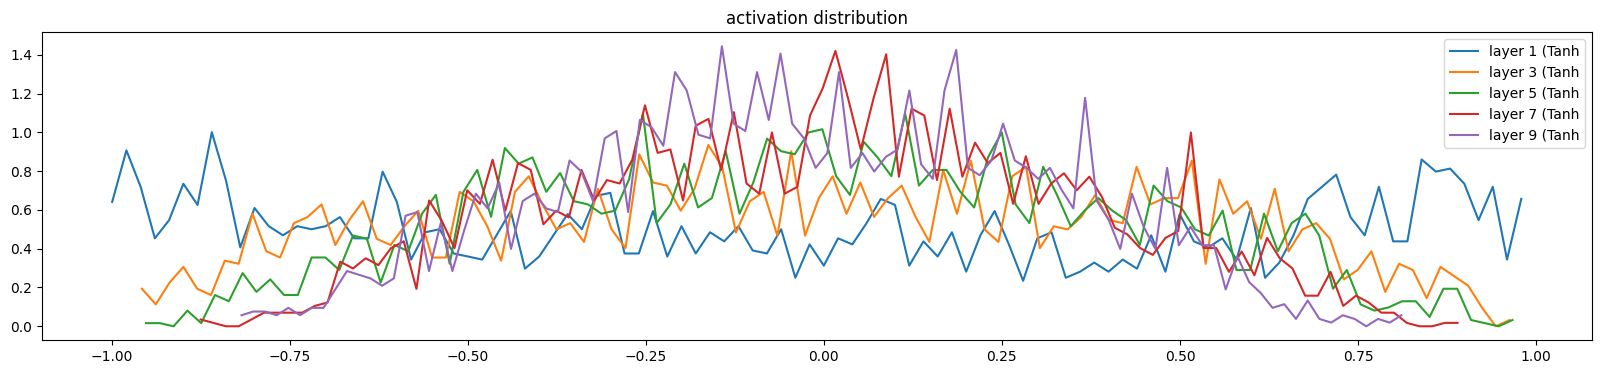

In [ ]:
# visualize histograms layer.weight *= 1.0
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')

layer 1 (      Tanh): mean -0.03, std 0.85, saturated: 47.66%
layer 3 (      Tanh): mean +0.00, std 0.84, saturated: 40.47%
layer 5 (      Tanh): mean -0.01, std 0.84, saturated: 42.38%
layer 7 (      Tanh): mean -0.01, std 0.84, saturated: 42.00%
layer 9 (      Tanh): mean -0.03, std 0.84, saturated: 42.41%


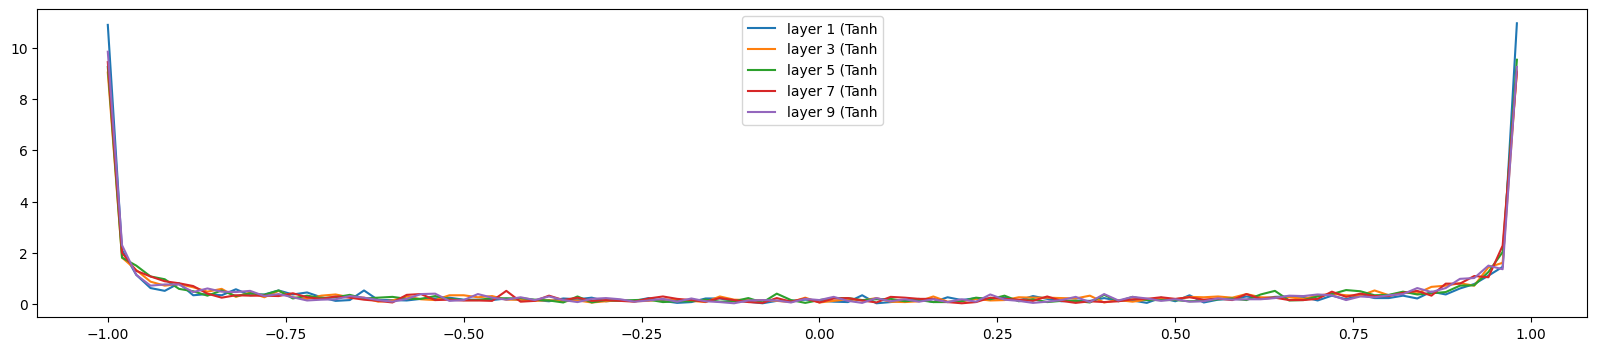

In [ ]:
# visualize histograms layer.weight *= 3.0
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);

layer 1 (      Tanh): mean -0.02, std 0.75, saturated: 20.25%
layer 3 (      Tanh): mean -0.00, std 0.69, saturated: 8.38%
layer 5 (      Tanh): mean +0.00, std 0.67, saturated: 6.62%
layer 7 (      Tanh): mean -0.01, std 0.66, saturated: 5.47%
layer 9 (      Tanh): mean -0.02, std 0.66, saturated: 6.12%


Text(0.5, 1.0, 'activation distribution')

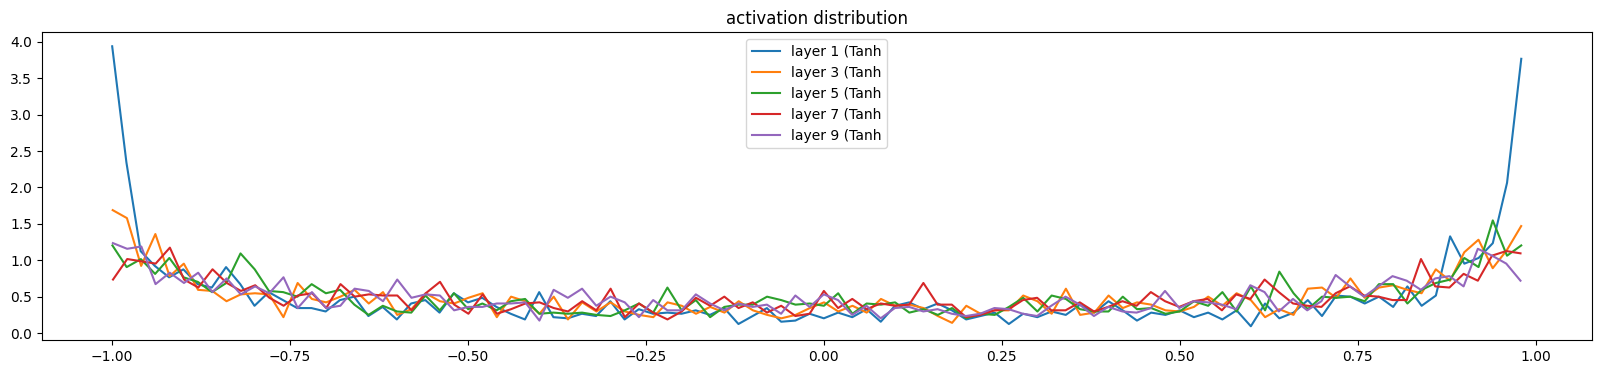

In [ ]:
# visualize histograms layer.weight *= 3.0
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')

## gradient distribution

layer 1 (      Tanh): mean +0.000003, std 1.753627e-04
layer 3 (      Tanh): mean -0.000003, std 2.183581e-04
layer 5 (      Tanh): mean +0.000009, std 2.588459e-04
layer 7 (      Tanh): mean +0.000017, std 2.806324e-04
layer 9 (      Tanh): mean -0.000014, std 3.054209e-04


Text(0.5, 1.0, 'gradient distribution')

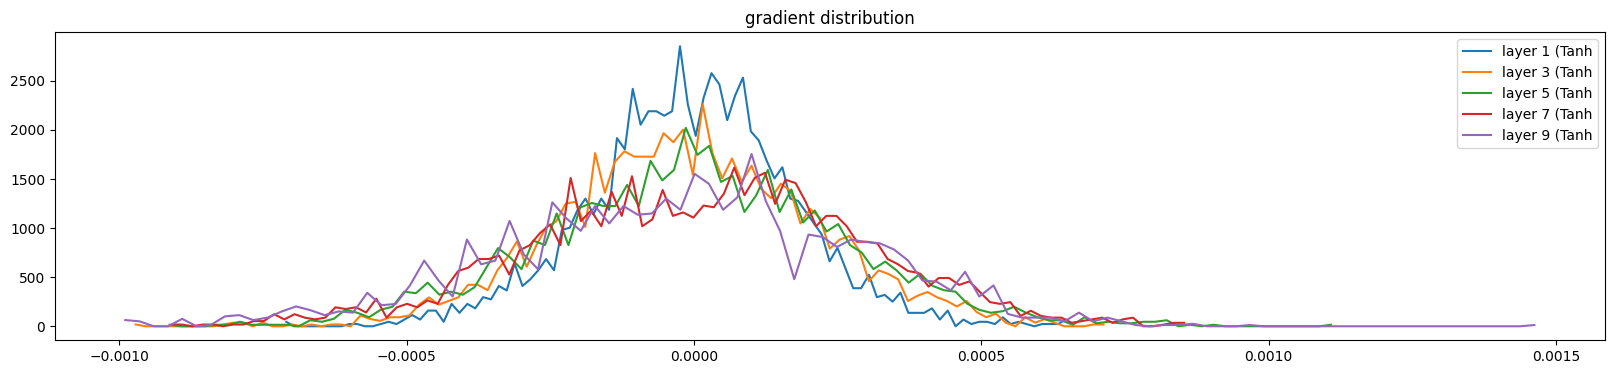

In [ ]:
# visualize histograms 1.0
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

layer 1 (      Tanh): mean -0.000001, std 9.977490e-04
layer 3 (      Tanh): mean +0.000010, std 7.421207e-04
layer 5 (      Tanh): mean +0.000003, std 5.569782e-04
layer 7 (      Tanh): mean +0.000017, std 3.952166e-04
layer 9 (      Tanh): mean -0.000014, std 3.051525e-04


Text(0.5, 1.0, 'gradient distribution')

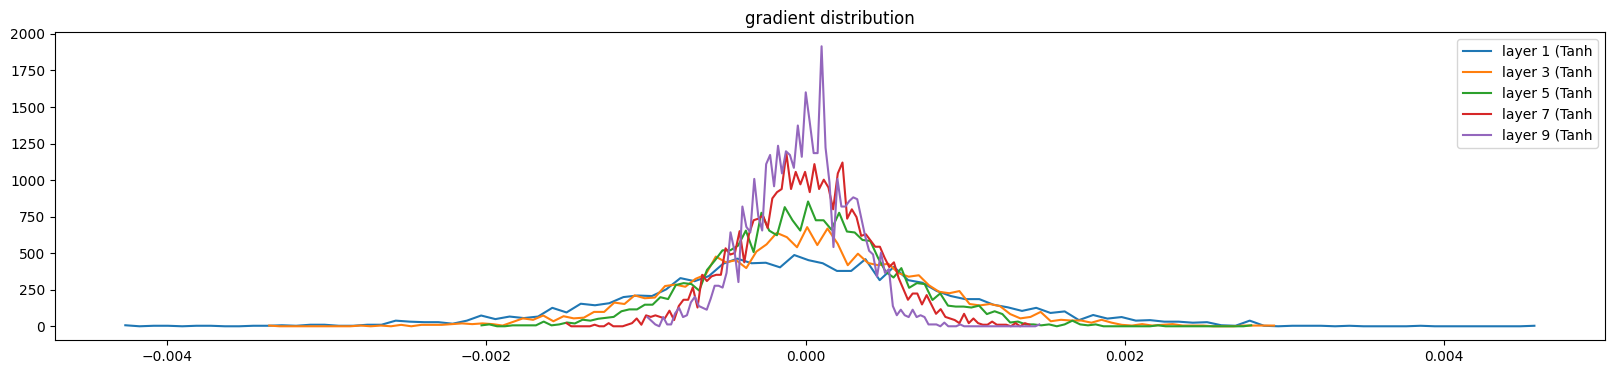

In [ ]:
# visualize histograms 3.0
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

Backward pass gradient statistics

layer 1 (      Tanh): mean +0.000010, std 4.205588e-04
layer 3 (      Tanh): mean -0.000003, std 3.991179e-04
layer 5 (      Tanh): mean +0.000003, std 3.743020e-04
layer 7 (      Tanh): mean +0.000015, std 3.290473e-04
layer 9 (      Tanh): mean -0.000014, std 3.054035e-04


Text(0.5, 1.0, 'gradient distribution')

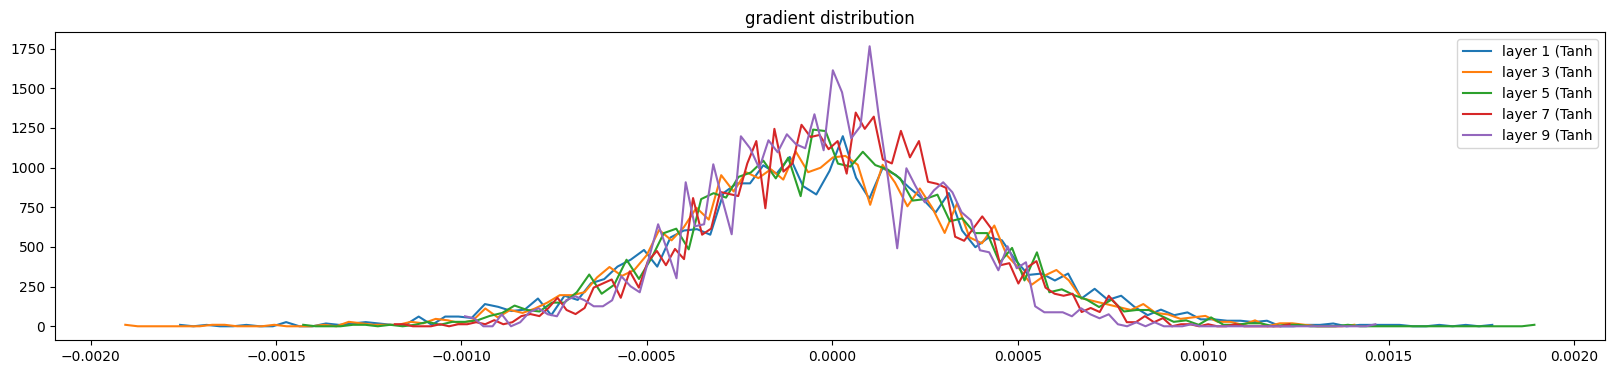

In [ ]:
# visualize histograms 5 / 3
# gradient distribution more constant here

plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

## weights gradient distribution

weight   (27, 10) | mean -0.000031 | std 1.365078e-03 | grad:data ratio 1.364090e-03
weight  (30, 100) | mean -0.000049 | std 1.207430e-03 | grad:data ratio 3.871660e-03
weight (100, 100) | mean +0.000016 | std 1.096730e-03 | grad:data ratio 6.601988e-03
weight (100, 100) | mean -0.000010 | std 9.893572e-04 | grad:data ratio 5.893091e-03
weight (100, 100) | mean -0.000011 | std 8.623432e-04 | grad:data ratio 5.158124e-03
weight (100, 100) | mean -0.000004 | std 7.388576e-04 | grad:data ratio 4.415211e-03
weight  (100, 27) | mean -0.000000 | std 2.364824e-02 | grad:data ratio 2.328203e+00


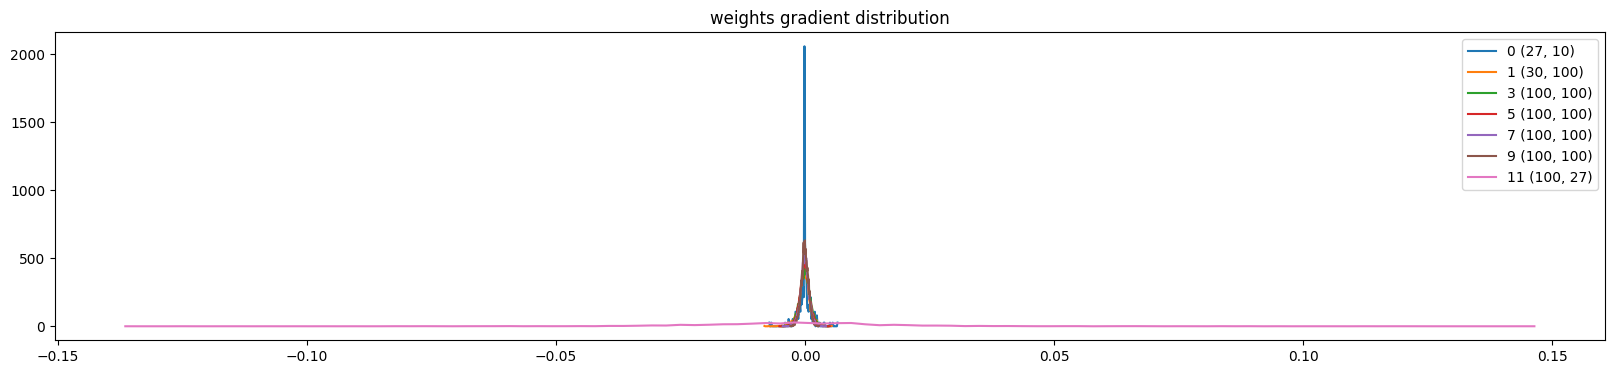

In [ ]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  t = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

## Update:data ratio over time

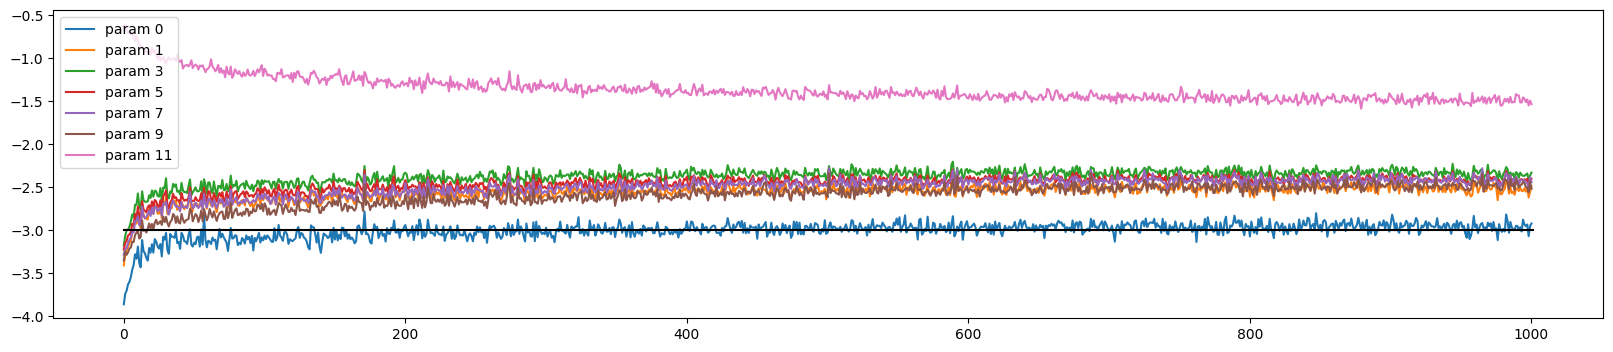

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

## Add Batch Normalization Layer

In [ ]:
# Add Batch Normalization Layer

class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size),
# ]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].gamma *= 0.1
  #layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 1.0 #5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

47024


In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function

  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


  if i >= 1000:
    break # AFTER_DEBUG: would take out obviously to run full optimization

      0/ 200000: 3.2870


## Diagnostic Graphs

layer 2 (      Tanh): mean -0.00, std 0.63, saturated: 2.78%
layer 5 (      Tanh): mean +0.00, std 0.64, saturated: 2.56%
layer 8 (      Tanh): mean -0.00, std 0.65, saturated: 2.25%
layer 11 (      Tanh): mean +0.00, std 0.65, saturated: 1.69%
layer 14 (      Tanh): mean +0.00, std 0.65, saturated: 1.88%


Text(0.5, 1.0, 'activation distribution')

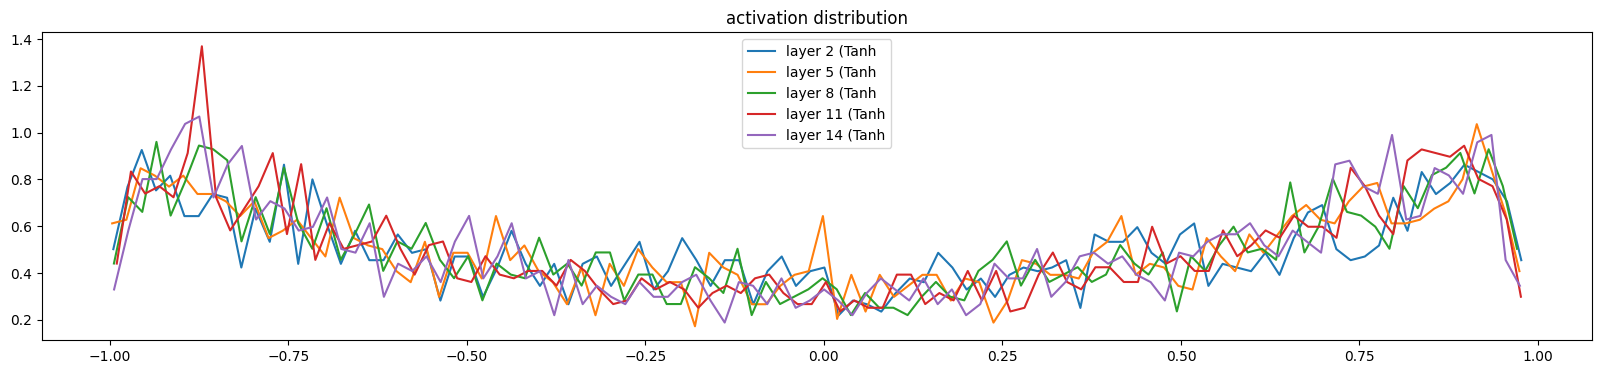

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')

layer 2 (      Tanh): mean -0.000000, std 2.640701e-03
layer 5 (      Tanh): mean -0.000000, std 2.245583e-03
layer 8 (      Tanh): mean -0.000000, std 2.045741e-03
layer 11 (      Tanh): mean +0.000000, std 1.983132e-03
layer 14 (      Tanh): mean -0.000000, std 1.952381e-03


Text(0.5, 1.0, 'gradient distribution')

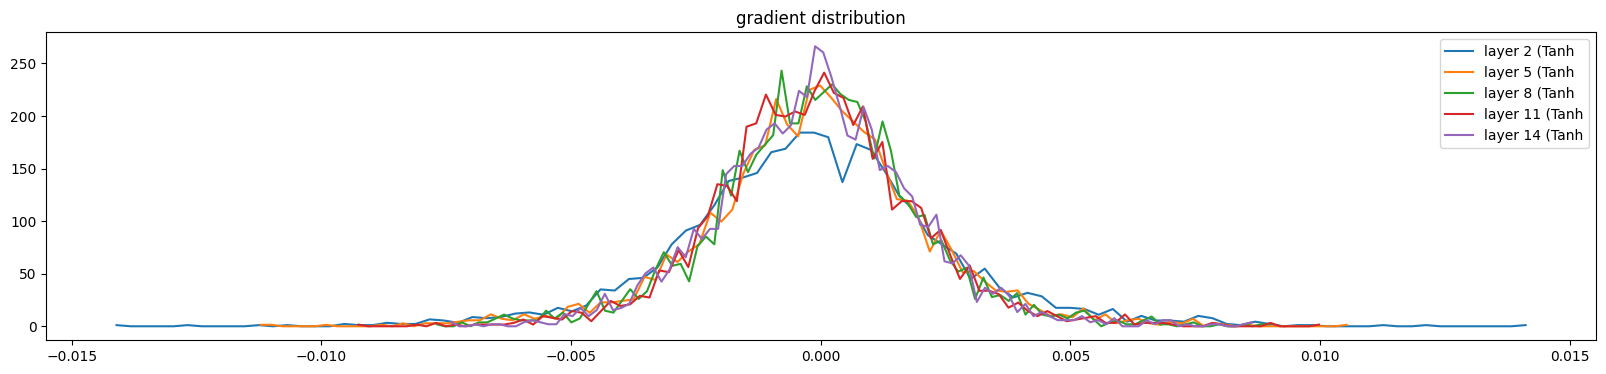

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

weight   (27, 10) | mean +0.000000 | std 8.020530e-03 | grad:data ratio 8.012626e-03
weight  (30, 100) | mean +0.000246 | std 9.241071e-03 | grad:data ratio 4.881088e-02
weight (100, 100) | mean +0.000113 | std 7.132877e-03 | grad:data ratio 6.964617e-02
weight (100, 100) | mean -0.000086 | std 6.234301e-03 | grad:data ratio 6.073737e-02
weight (100, 100) | mean +0.000052 | std 5.742182e-03 | grad:data ratio 5.631478e-02
weight (100, 100) | mean +0.000032 | std 5.672202e-03 | grad:data ratio 5.570122e-02
weight  (100, 27) | mean -0.000082 | std 1.209415e-02 | grad:data ratio 1.160105e-01


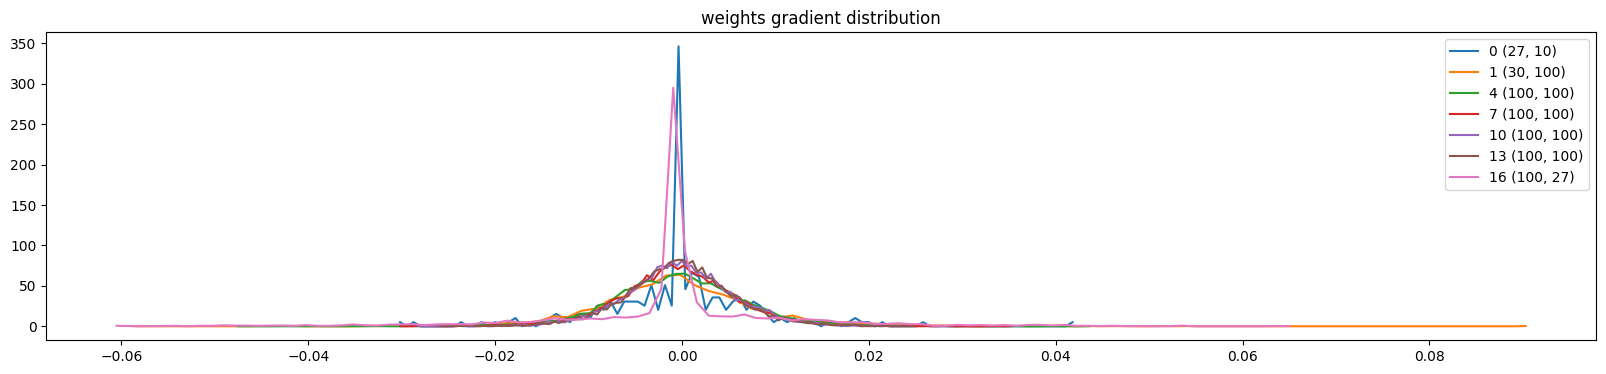

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  t = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

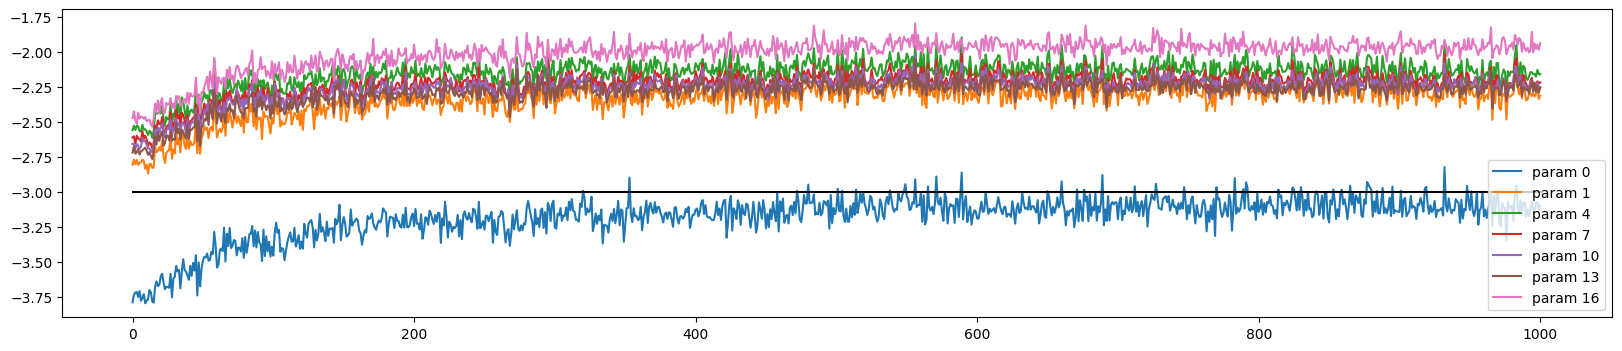

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

# Aside: The Essence of Linear Layers

---

**The Essence of Linear Layers:**

1. **Linear Transformation**: At its core, a linear layer in a neural network is simply a linear transformation. It applies a weight matrix to its input and then adds a bias. This operation can be summarized as \(y = Wx + b\).

2. **Stacking Linear Layers**: When you stack multiple linear layers together without any non-linearities between them, no matter how many you add, the entire stack behaves just like a single linear layer. In other words, multiple stacked linear operations can always be reduced to one. Think of it as multiple linear equations that can be collapsed into one overarching linear equation.

---

**Introducing Non-Linearities:**

1. **Limitation of Linearity**: Despite the elegance of linear layers, they have a critical limitation. If you're trying to model complex, non-linear data (which is most real-world data), a purely linear stack won't suffice. It can't capture the intricacies of such data.

2. **Power of Non-Linearities**: This is where non-linear activation functions, like the tanh, come in. By introducing them between linear layers, you allow the network to model and learn non-linear patterns in the data. In essence, they break the linearity and give the network its power to approximate any arbitrary function, making it a universal function approximator.

---

**The Interesting Observation about Optimization**:

1. **Training Dynamics**: Even though stacking linear layers doesn't enhance the expressive power of the model in the forward pass, the backward pass during training (using backpropagation) behaves differently. When optimizing a deep stack of linear layers, the chain rule's application in the backward pass creates unique dynamics that wouldn't be observed with a single linear layer.

2. **Research Nuances**: There are deep dives in the research community that analyze the behavior of such deep linear networks during optimization. While they're still fundamentally linear in their output, the training process exhibits interesting characteristics.

---

**The Crux**:
Linear layers by themselves, no matter how many you stack, will always produce linear transformations. To capture the complexity of real-world data and patterns, we introduce non-linear activation functions between these layers. This non-linearity is the magic ingredient that transforms a simple linear model into a powerful neural network capable of approximating virtually any function.

In simpler terms, think of linear layers as straight lines. No matter how many straight lines you draw, they'll always remain straight. But introduce a curve (non-linearity), and now you can shape and bend these lines in countless ways, allowing you to draw almost any pattern imaginable.

# Aside: A neural network can approximate virtually any function

---

**1. Universal Approximation Theorem (UAT)**:
Before diving into examples, it's essential to understand the foundation: the Universal Approximation Theorem. The UAT states that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate any continuous function on compact subsets of $ \mathbb{R}^n $, under mild assumptions on the activation function.

Now, what does that mean in practice?

---

**Examples**:

**2. Regression Tasks**:
- **Function**: Let's say you have data that seems to follow the function \( y = sin(x) \).
- **Neural Network**: You can train a simple neural network with one hidden layer to approximate this function. Given a sufficient number of neurons in that hidden layer and enough training data, the network can learn to approximate the sine function. Even if you add noise to the data, the network can still learn the underlying sine wave pattern.

**3. Image Recognition**:
- **Function**: Converting a matrix of pixel values into a label (like "cat" or "dog").
- **Neural Network**: Convolutional Neural Networks (CNNs), a type of deep neural network, can approximate the complex function that maps an image's pixel values to its corresponding label. Considering the vast variety in images (different poses, lighting, backgrounds), this is an incredibly intricate function to approximate.

**4. Natural Language Processing**:
- **Function**: Translating a sentence from English to French.
- **Neural Network**: Sequence-to-sequence models, often built using Recurrent Neural Networks (RNNs) or Transformers, can approximate the function that maps an English sentence to its French counterpart. Given the nuances in languages, this function is highly complex.

**5. Game Playing**:
- **Function**: Determining the best move in a game of chess based on the current board state.
- **Neural Network**: Deep Q-networks (a combination of deep learning and reinforcement learning) can approximate the optimal action-selection function for games like chess or Go, even when considering the vast number of potential board configurations.

**6. Generative Tasks**:
- **Function**: Generating a new image of a human face that doesn't exist.
- **Neural Network**: Generative Adversarial Networks (GANs) can approximate the complex distribution of human face images, allowing them to produce entirely new and realistic face images.

---

**In Essence**:
When we say a neural network can approximate virtually any function, we mean that given enough neurons, appropriate architecture, and sufficient training data, a neural network can learn to mimic or represent a vast range of tasks and functions, from simple mathematical equations to highly intricate processes like image recognition or language translation. The examples above showcase the diverse range of functions neural networks can approximate.

# Exercise 1

` I did not get around to seeing what happens when you initialize all weights and biases to zero. Try this and train the neural net. You might think either that 1) the network trains just fine or 2) the network doesn't train at all, but actually it is 3) the network trains but only partially, and achieves a pretty bad final performance. Inspect the gradients and activations to figure out what is happening and why the network is only partially training, and what part is being trained exactly.`




# Full training

In [ ]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size),
# ]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].gamma *= 0.1
  #layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

47024


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function

  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


  # if i >= 1000:
  #   break

      0/ 200000: 3.2870
  10000/ 200000: 2.3578
  20000/ 200000: 2.1042
  30000/ 200000: 1.9646
  40000/ 200000: 2.2144
  50000/ 200000: 2.2263
  60000/ 200000: 1.7340
  70000/ 200000: 2.1744
  80000/ 200000: 2.1895
  90000/ 200000: 1.8283
 100000/ 200000: 2.3643
 110000/ 200000: 2.2595
 120000/ 200000: 2.0967
 130000/ 200000: 1.8992
 140000/ 200000: 1.8313
 150000/ 200000: 1.9430
 160000/ 200000: 1.8673
 170000/ 200000: 1.8335
 180000/ 200000: 2.2503
 190000/ 200000: 2.0148


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

# put layers into eval mode
for layer in layers:
  layer.training = False
split_loss('train')
split_loss('val')

train 2.0039474964141846
val 2.080599069595337


layer 2 (      Tanh): mean -0.02, std 0.70, saturated: 16.92%
layer 5 (      Tanh): mean -0.03, std 0.73, saturated: 19.10%
layer 8 (      Tanh): mean -0.00, std 0.76, saturated: 18.57%
layer 11 (      Tanh): mean +0.02, std 0.79, saturated: 20.85%
layer 14 (      Tanh): mean -0.01, std 0.80, saturated: 26.03%


Text(0.5, 1.0, 'activation distribution')

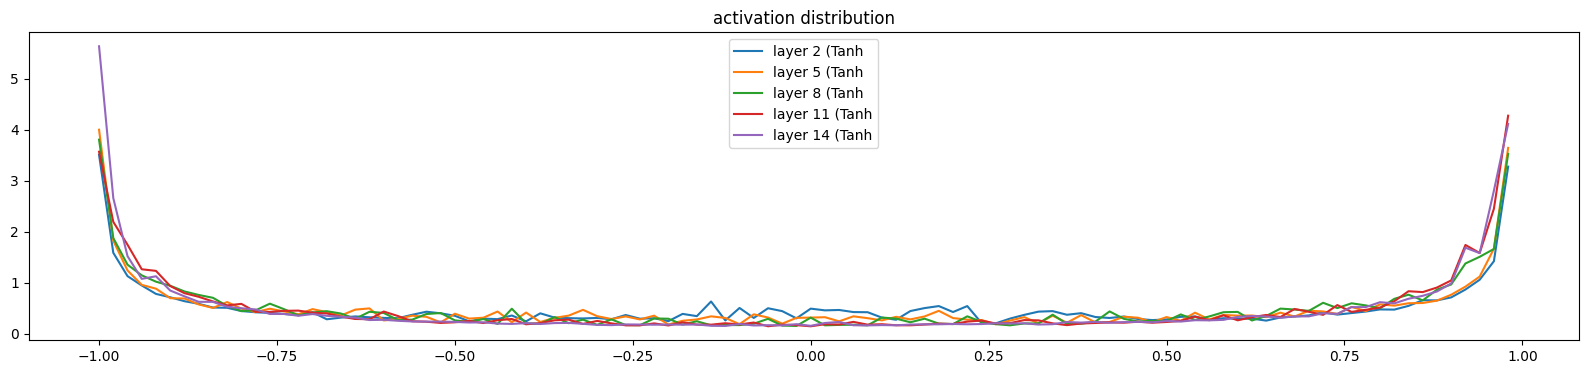

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

AttributeError: ignored

<Figure size 2000x400 with 0 Axes>

weight   (27, 10) | mean +0.000000 | std 1.369385e-02 | grad:data ratio 1.194325e-02
weight  (30, 100) | mean +0.000061 | std 6.415255e-03 | grad:data ratio 1.430585e-02
weight (100, 100) | mean +0.000060 | std 4.184036e-03 | grad:data ratio 1.534861e-02
weight (100, 100) | mean -0.000077 | std 4.403574e-03 | grad:data ratio 1.640300e-02
weight (100, 100) | mean +0.000021 | std 4.558815e-03 | grad:data ratio 1.746765e-02
weight (100, 100) | mean -0.000019 | std 4.729692e-03 | grad:data ratio 1.877212e-02
weight  (100, 27) | mean +0.000046 | std 8.238951e-03 | grad:data ratio 2.210177e-02


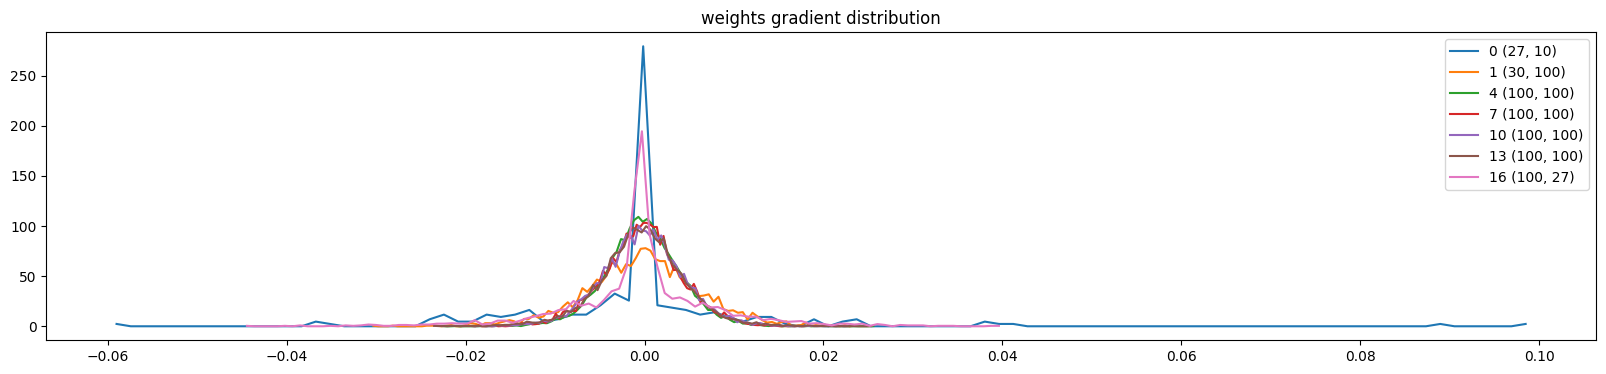

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  t = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

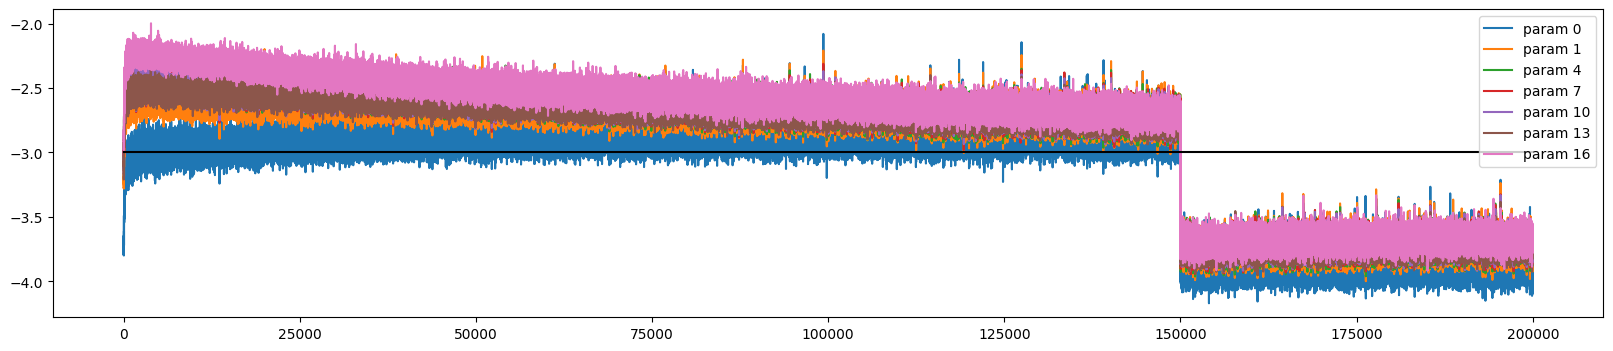

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

## Full training with weights and bias set to 0.0

In [ ]:
# self.weight = torch.zeros((fan_in, fan_out))
# self.gamma = torch.zeros(dim)

class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    # self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.weight = torch.zeros((fan_in, fan_out))
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    # self.gamma = torch.ones(dim)
    self.gamma = torch.zeros(dim)

    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size),
# ]

# with torch.no_grad():
#   # last layer: make less confident
#   layers[-1].gamma *= 0.1
#   #layers[-1].weight *= 0.1
#   # all other layers: apply gain
#   for layer in layers[:-1]:
#     if isinstance(layer, Linear):
#       layer.weight *= 5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

47024


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function

  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])

      0/ 200000: 3.2958
  10000/ 200000: 2.7882
  20000/ 200000: 2.7518
  30000/ 200000: 2.8506
  40000/ 200000: 2.8221
  50000/ 200000: 2.8987
  60000/ 200000: 2.6038
  70000/ 200000: 2.6751
  80000/ 200000: 3.0131
  90000/ 200000: 2.7753
 100000/ 200000: 2.6079
 110000/ 200000: 2.5273
 120000/ 200000: 2.6690
 130000/ 200000: 2.6426
 140000/ 200000: 2.8423
 150000/ 200000: 2.5484
 160000/ 200000: 2.9788
 170000/ 200000: 2.9535
 180000/ 200000: 2.8622
 190000/ 200000: 2.8513


In [ ]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

# put layers into eval mode
for layer in layers:
  layer.training = False
split_loss('train')
split_loss('val')

train 2.8226749897003174
val 2.8210511207580566


layer 2 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 5 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 8 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 11 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 14 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%


Text(0.5, 1.0, 'activation distribution')

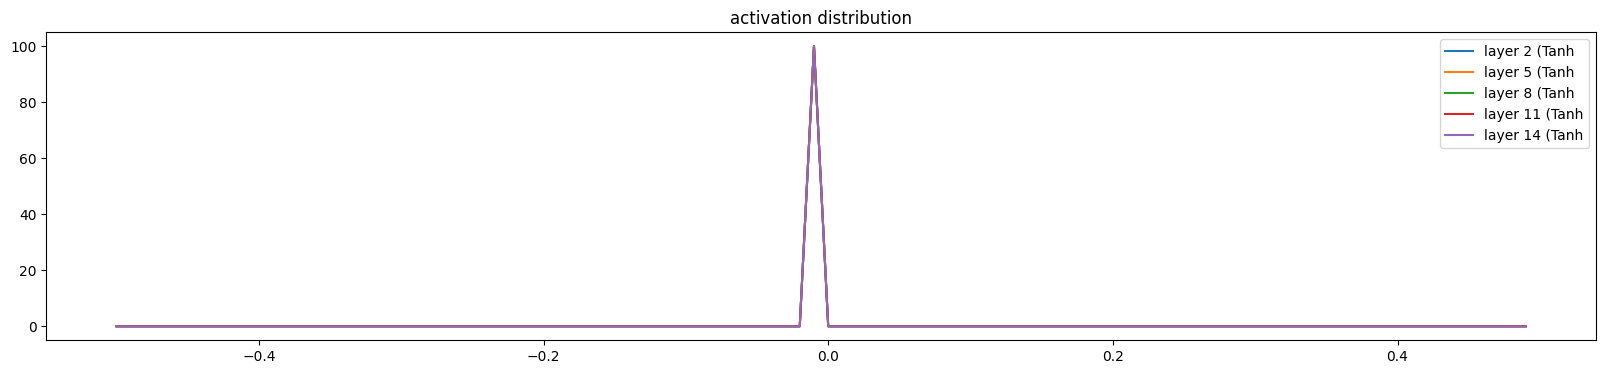

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

AttributeError: ignored

<Figure size 2000x400 with 0 Axes>

weight   (27, 10) | mean +0.000000 | std 0.000000e+00 | grad:data ratio 0.000000e+00
weight  (30, 100) | mean +0.000000 | std 0.000000e+00 | grad:data ratio nan
weight (100, 100) | mean +0.000000 | std 0.000000e+00 | grad:data ratio nan
weight (100, 100) | mean +0.000000 | std 0.000000e+00 | grad:data ratio nan
weight (100, 100) | mean +0.000000 | std 0.000000e+00 | grad:data ratio nan
weight (100, 100) | mean +0.000000 | std 0.000000e+00 | grad:data ratio nan
weight  (100, 27) | mean +0.000000 | std 0.000000e+00 | grad:data ratio nan


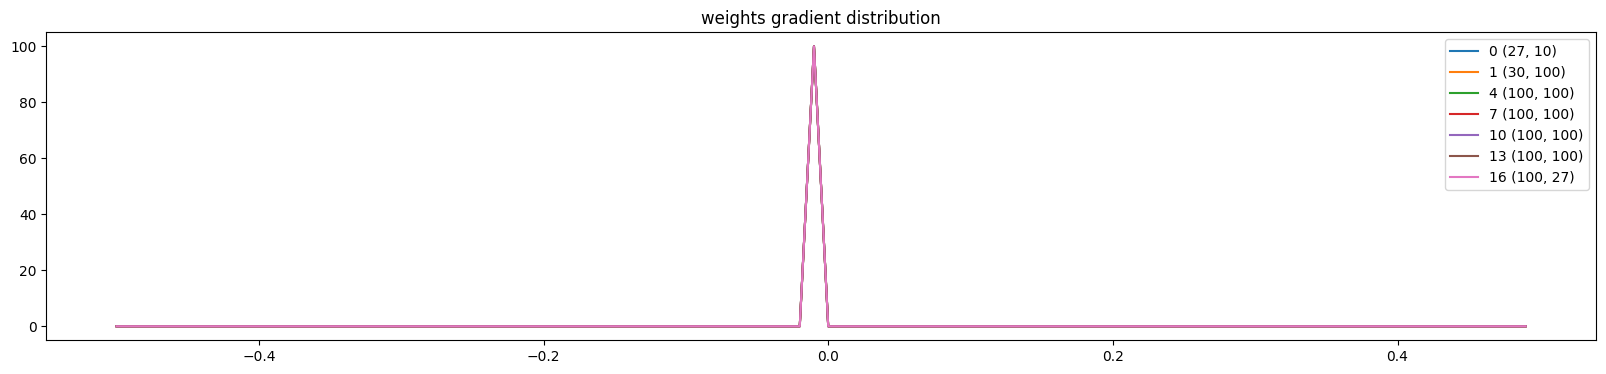

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  t = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

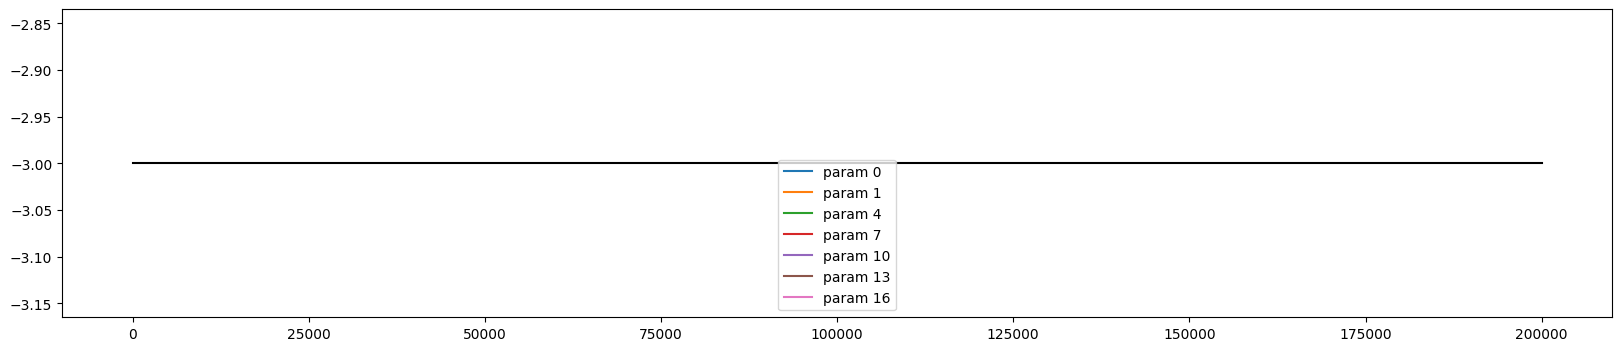

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

## Interpretation

### Step 1: Inspect Gradients and Activations
After training, you'll want to inspect the gradients and activations to understand what's happening inside the network. The idea behind inspecting these values is to determine which parts of the network are "active" and updating, and which parts are essentially dormant.

Here's what's likely happening:

- **Vanishing Gradients**: When you initialize all weights to zero, it leads to symmetry in the network. Every neuron behaves the same way, leading to identical gradients. As a result, during backpropagation, every neuron gets updated with the same gradient. This symmetry breaking never gets resolved during training, which means only a subset of the neurons will be effectively trained.

- **Stuck Activations**: With zero initialization, the activations in the network could end up being the same for all neurons, especially in deeper layers. This could lead to a situation where only the last layer (the output layer) is effectively getting trained, while the earlier layers are "stuck" and don't contribute much.

To determine which parts of the network are getting trained, inspect the gradients. If a layer has very small gradients, it means it's not learning much.

### Step 2: Interpretation
From the observations in the previous step, you can infer which parts of the network are effectively being trained and which parts are dormant. This will give you insights into why the network's performance is suboptimal with zero initialization.

### Additional Note:
Setting weights to zero is generally a bad idea for deep neural networks because of the symmetry problem. It effectively reduces the capacity of the network. In practice, random weight initialization methods, like Xavier or He initialization, are used to ensure that neurons in the network start in different states and can learn different features from the data.

# Exercise 2

In [ ]:
def fold_batchnorm_into_linear(linear_layer, batchnorm_layer):
    """
    Adjust the weights and biases of a linear layer (fully connected layer)
    using the parameters of a subsequent batch normalization layer.
    """
    # Adjust the linear layer weights using BatchNorm's gamma (scale) and beta (shift)
    gamma_reshaped = (batchnorm_layer.gamma / torch.sqrt(batchnorm_layer.running_var + batchnorm_layer.eps)).reshape(1, -1)
    adjusted_weight = linear_layer.weight * gamma_reshaped
    if linear_layer.bias is not None:
        adjusted_bias = linear_layer.bias * batchnorm_layer.gamma / torch.sqrt(batchnorm_layer.running_var + batchnorm_layer.eps)
        adjusted_bias += (batchnorm_layer.beta - batchnorm_layer.running_mean * batchnorm_layer.gamma / torch.sqrt(batchnorm_layer.running_var + batchnorm_layer.eps))
    else:
        adjusted_bias = batchnorm_layer.beta - batchnorm_layer.running_mean * batchnorm_layer.gamma / torch.sqrt(batchnorm_layer.running_var + batchnorm_layer.eps)

    linear_layer.weight.data = adjusted_weight
    if linear_layer.bias is not None:
        linear_layer.bias.data = adjusted_bias


# Apply the folding process to the model
for i in range(len(layers) - 1):
    if isinstance(layers[i], Linear) and isinstance(layers[i + 1], BatchNorm1d):
        fold_batchnorm_into_linear(layers[i], layers[i + 1])

# Remove the BatchNorm layers
layers = [layer for layer in layers if not isinstance(layer, BatchNorm1d)]

# Verify the forward pass remains unchanged
with torch.no_grad():
    emb = C[Xb]
    x = emb.view(emb.shape[0], -1)
    for layer in layers:
        x = layer(x)
    new_loss = F.cross_entropy(x, Yb)

print(f'Original Loss: {loss.item():.4f}, New Loss after Folding: {new_loss.item():.4f}')


Original Loss: 2.0481, New Loss after Folding: 3.0481


The difference in the loss indicates that the process of "folding" the BatchNorm parameters into the Linear layer wasn't perfect. This could be because of various reasons including the approximation nature of the folding or potential errors in the folding process.

To understand and potentially mitigate this difference, consider the following:

1. **Validation**: Ensure that the folding process was implemented correctly. Verify that the BatchNorm parameters were used correctly in the adjusted weights and biases of the preceding Linear layer.

2. **BatchNorm Dynamics**: During training, BatchNorm uses batch statistics (mean and variance). However, during inference, it uses accumulated statistics (running mean and variance). Make sure that the network was in evaluation mode (using accumulated statistics) when comparing the losses before and after folding.

3. **Training Phase**: If you folded the BatchNorm into the Linear layers immediately after training, the network might not have fully adapted to the new parameters. Consider doing a few more optimization steps with a reduced learning rate after folding, to fine-tune the network.

4. **Complexity**: The folding operation is an approximation. In complex networks or specific scenarios, the approximation might not be perfect. This is especially true if BatchNorm has specific dynamics that are not fully captured by merely adjusting the weights and biases.

5. **Comparison**: To verify the correctness of the folding process, instead of just looking at the loss, you can compare the actual outputs (i.e., logits) of the network before and after folding for the same input. They should be very close to each other.

To ensure the best results, you might want to review the folding function and the way you're evaluating the network post-folding. If needed, consider a short fine-tuning phase post-folding to allow the network to adjust to its new parameters.

# Glossary